<a href="https://colab.research.google.com/github/koheikobayashi/machine-learning/blob/main/%E5%8A%B9%E6%9E%9C%E6%A4%9C%E8%A8%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 目次
- [A/B テスト](#scrollTo=A%2FB+%E3%83%86%E3%82%B9%E3%83%88)
- [差分の差法（DID）](#scrollTo=%E5%B7%AE%E5%88%86%E3%81%AE%E5%B7%AE%E6%B3%95%EF%BC%88DID%EF%BC%89)
- [回帰不連続デザイン（RDD）](#scrollTo=%E5%9B%9E%E5%B8%B0%E4%B8%8D%E9%80%A3%E7%B6%9A%E3%83%87%E3%82%B6%E3%82%A4%E3%83%B3%EF%BC%88RDD%EF%BC%89)
- [反実仮想](#scrollTo=%E5%8F%8D%E5%AE%9F%E4%BB%AE%E6%83%B3)
- [Feedback Loop](#scrollTo=Feedback+Loop)
- [平均処置効果](#scrollTo=%E5%B9%B3%E5%9D%87%E5%87%A6%E7%BD%AE%E5%8A%B9%E6%9E%9C)
- [期待値](#scrollTo=%E6%9C%9F%E5%BE%85%E5%80%A4)
- [条件付き期待値](#scrollTo=%E6%9D%A1%E4%BB%B6%E4%BB%98%E3%81%8D%E6%9C%9F%E5%BE%85%E5%80%A4)
- [A/A テスト](#scrollTo=A%2FA+%E3%83%86%E3%82%B9%E3%83%88)
- [統計的仮説検証](#scrollTo=%E7%B5%B1%E8%A8%88%E7%9A%84%E4%BB%AE%E8%AA%AC%E6%A4%9C%E8%A8%BC)
- [回帰分析](#scrollTo=%E5%9B%9E%E5%B8%B0%E5%88%86%E6%9E%90)
- [誤差項](#scrollTo=%E8%AA%A4%E5%B7%AE%E9%A0%85)
- [標準誤差](#scrollTo=%E6%A8%99%E6%BA%96%E8%AA%A4%E5%B7%AE)
- [帰無仮説](#scrollTo=%E5%B8%B0%E7%84%A1%E4%BB%AE%E8%AA%AC)
- [仮説検定](#scrollTo=%E4%BB%AE%E8%AA%AC%E6%A4%9C%E5%AE%9A)
- [p値](#scrollTo=p%E5%80%A4)
- [統計的に非有意](#scrollTo=%E7%B5%B1%E8%A8%88%E7%9A%84%E3%81%AB%E9%9D%9E%E6%9C%89%E6%84%8F)
- [有意水準](#scrollTo=%E6%9C%89%E6%84%8F%E6%B0%B4%E6%BA%96)
- [信頼区間](#scrollTo=%E4%BF%A1%E9%A0%BC%E5%8C%BA%E9%96%93)
- [共変量](#scrollTo=%E5%85%B1%E5%A4%89%E9%87%8F)
- [バランステスト](#scrollTo=%E3%83%90%E3%83%A9%E3%83%B3%E3%82%B9%E3%83%86%E3%82%B9%E3%83%88)
- [t値](#scrollTo=t%E5%80%A4)
- [p-hacking](#scrollTo=p-hacking)
- [クラスターA/Bテスト](#scrollTo=%E3%82%AF%E3%83%A9%E3%82%B9%E3%82%BF%E3%83%BCA%2FB%E3%83%86%E3%82%B9%E3%83%88)
- [チェリーピッキング](#scrollTo=%E3%83%81%E3%82%A7%E3%83%AA%E3%83%BC%E3%83%94%E3%83%83%E3%82%AD%E3%83%B3%E3%82%B0)
- [コルモゴロフ-スミルノフ検定](#scrollTo=%E3%82%B3%E3%83%AB%E3%83%A2%E3%82%B4%E3%83%AD%E3%83%95-%E3%82%B9%E3%83%9F%E3%83%AB%E3%83%8E%E3%83%95%E6%A4%9C%E5%AE%9A)
- [層化 A/B テスト](#scrollTo=%E5%B1%A4%E5%8C%96+A%2FB+%E3%83%86%E3%82%B9%E3%83%88)
- [クラスター頑健標準誤差](#scrollTo=%E3%82%AF%E3%83%A9%E3%82%B9%E3%82%BF%E3%83%BC%E9%A0%91%E5%81%A5%E6%A8%99%E6%BA%96%E8%AA%A4%E5%B7%AE)
- [局所平均処置効果（LATE）](#scrollTo=%E5%B1%80%E6%89%80%E5%B9%B3%E5%9D%87%E5%87%A6%E7%BD%AE%E5%8A%B9%E6%9E%9C%EF%BC%88LATE%EF%BC%89)
- [交差項](#scrollTo=%E4%BA%A4%E5%B7%AE%E9%A0%85)
- [rdrobustライブラリ](#scrollTo=rdrobust%E3%83%A9%E3%82%A4%E3%83%96%E3%83%A9%E3%83%AA)
- [アウトカム](#scrollTo=%E3%82%A2%E3%82%A6%E3%83%88%E3%82%AB%E3%83%A0)
- [固定効果モデル](#scrollTo=%E5%9B%BA%E5%AE%9A%E5%8A%B9%E6%9E%9C%E3%83%A2%E3%83%87%E3%83%AB)
- [パラレルトレンド仮定](#scrollTo=%E3%83%91%E3%83%A9%E3%83%AC%E3%83%AB%E3%83%88%E3%83%AC%E3%83%B3%E3%83%89%E4%BB%AE%E5%AE%9A)
- [McCrary の検定](#scrollTo=McCrary+%E3%81%AE%E6%A4%9C%E5%AE%9A)
- [Sharp RDD](#scrollTo=Sharp+RDD)
- [Fuzzy RDD](#scrollTo=Fuzzy+RDD)
- [as-if 条件](#scrollTo=as-if+%E6%9D%A1%E4%BB%B6)
- [密度関数](#scrollTo=%E5%AF%86%E5%BA%A6%E9%96%A2%E6%95%B0)
- [diagnostic tests](#scrollTo=diagnostic+tests)
- [処置確率](#scrollTo=%E5%87%A6%E7%BD%AE%E7%A2%BA%E7%8E%87)
- [右側極限](#scrollTo=%E5%8F%B3%E5%81%B4%E6%A5%B5%E9%99%90)
- [左側極限](#scrollTo=%E5%B7%A6%E5%81%B4%E6%A5%B5%E9%99%90)
- [局所多項式回帰](#scrollTo=%E5%B1%80%E6%89%80%E5%A4%9A%E9%A0%85%E5%BC%8F%E5%9B%9E%E5%B8%B0)
- [局所線形回帰](#scrollTo=%E5%B1%80%E6%89%80%E7%B7%9A%E5%BD%A2%E5%9B%9E%E5%B8%B0)
- [線形モデル](#scrollTo=%E7%B7%9A%E5%BD%A2%E3%83%A2%E3%83%87%E3%83%AB)
- [バリアンス](#scrollTo=%E3%83%90%E3%83%AA%E3%82%A2%E3%83%B3%E3%82%B9)
- [潜在スコア](#scrollTo=%E6%BD%9C%E5%9C%A8%E3%82%B9%E3%82%B3%E3%82%A2)
- [共変量のバランステスト](#scrollTo=%E5%85%B1%E5%A4%89%E9%87%8F%E3%81%AE%E3%83%90%E3%83%A9%E3%83%B3%E3%82%B9%E3%83%86%E3%82%B9%E3%83%88)

<h1 id="A%2FB+%E3%83%86%E3%82%B9%E3%83%88">A/B テスト</h1>

### A/Bテストの解説


 A/Bテストは、2つのグループ（A, B）間での効果を比較するための統計的手法です。ウェブサイトのデザイン変更や広告キャンペーンの効果を測定する際によく使用されます。一般的に、片方のグループ（Aグループ）がコントロール群、もう片方のグループ（Bグループ）がテスト群です。


 #### A/Bテストと数式


 A/Bテストの効果を数式で表現する方法の一つは、2つのグループの平均の差を比較することです。ここで使用するのが**差の推定**です。数式で表現すると以下のようになります：


 $$ D = ar{X}_B - ar{X}_A $$


 - $\bar{X}_A$: Aグループの平均値
 - $\bar{X}_B$: Bグループの平均値


 また、この差が統計的に有意であるかを確認するために、**標準誤差**と**t検定**を使用します。


 $$ SE = \sqrt{\frac{s_A^2}{n_A} + \frac{s_B^2}{n_B}} $$


 - $SE$: 標準誤差
 - $s_A$: Aグループの標準偏差
 - $s_B$: Bグループの標準偏差
 - $n_A$: Aグループのサンプルサイズ
 - $n_B$: Bグループのサンプルサイズ


 そしてt値は次のように計算されます。


 $$ t = \frac{D}{SE} $$


 #### Pythonでの効果検証


 Pythonを用いたA/Bテストの解析は『Pythonで学ぶ効果検証入門』で詳しく説明されています。この書籍では、上記で述べた統計的手法をPythonを用いて実装する過程が紹介されています。

In [1]:
# PythonでA/Bテストを実施するコード
import numpy as np
from scipy import stats


# サンプルデータとしてA, Bグループの観測データ
A_data = np.array([14, 15, 15, 13, 12, 14, 16])
B_data = np.array([16, 18, 19, 17, 18, 16, 20])


# Aグループの平均値を計算
mean_A = np.mean(A_data)
print('Aグループの平均値:', mean_A)


# Bグループの平均値を計算
mean_B = np.mean(B_data)
print('Bグループの平均値:', mean_B)


# AグループとBグループの平均の差
D = mean_B - mean_A
print('平均の差:', D)


# Aグループの標準偏差を計算
std_A = np.std(A_data, ddof=1)
print('Aグループの標準偏差:', std_A)


# Bグループの標準偏差を計算
std_B = np.std(B_data, ddof=1)
print('Bグループの標準偏差:', std_B)


# A/Bテストの標準誤差を計算
SE = np.sqrt(std_A**2/len(A_data) + std_B**2/len(B_data))
print('標準誤差:', SE)


# t値を計算
t_value = D / SE
print('t値:', t_value)


# t検定を実行しp値を得る
_, p_value = stats.ttest_ind(A_data, B_data)
print('p値:', p_value)


# p値が0.05未満であれば有意差があると判断
if p_value < 0.05:
    print('結果: 有意差あり')
else:
    print('結果: 有意差なし')

Aグループの平均値: 14.142857142857142
Bグループの平均値: 17.714285714285715
平均の差: 3.571428571428573
Aグループの標準偏差: 1.3451854182690985
Bグループの標準偏差: 1.4960264830861911
標準誤差: 0.7604152106033958
t値: 4.696682183138623
p値: 0.0005172410776743846
結果: 有意差あり


<h1 id="%E5%B7%AE%E5%88%86%E3%81%AE%E5%B7%AE%E6%B3%95%EF%BC%88DID%EF%BC%89">差分の差法（DID）</h1>

差分の差法（Difference-in-Differences, DID）は、処置群と対照群の時間的変化を比較することで、処置の効果を推定する手法です。この手法は、特定の政策や介入が導入される前後での処置群と対照群の平均的な変化を比較することで、その介入の平均的な効果を推定します。


 DIDの数式は以下のように表現されます：


 $$ \text{DID} = (\bar{Y}_{T1} - \bar{Y}_{T0}) - (\bar{Y}_{C1} - \bar{Y}_{C0}) $$


 ここで、
 - $\bar{Y}_{T1}$ は、処置群の介入後の平均的なアウトカム。
 - $\bar{Y}_{T0}$ は、処置群の介入前の平均的なアウトカム。
 - $\bar{Y}_{C1}$ は、対照群の介入後の平均的なアウトカム。
 - $\bar{Y}_{C0}$ は、対照群の介入前の平均的なアウトカム。


 この数式の意味するところは、まず処置群での変化を計算し、次に対照群での変化を計算し、その差を取ることで介入の純粋な効果を求めるというものです。これにより、共通の時間的な影響を取り除きます。


 Pythonで学ぶ効果検証入門では、このDIDを計算する方法と考え方を詳細に解説しています。この手法は、政策評価や社会科学の実証研究で広く使用されています。特に、ランダム化実験が難しい場合や、自然実験のデータを用いる場合に有効です。

In [ ]:
# データを仮定（実際のデータはサンプルやデータセットとして用意されるべき）
import pandas as pd


data = pd.DataFrame({
'group': ['treatment'] * 4 + ['control'] * 4,
'time': ['pre', 'post', 'pre', 'post', 'pre', 'post', 'pre', 'post'],
'outcome': [5, 9, 7, 12, 4, 5, 6, 6]
})


# データを表示して確認
print(data)


# 処置群と対照群ごとの平均を計算して表示
pre_treatment_mean = data[(data['group'] == 'treatment') & (data['time'] == 'pre')]['outcome'].mean()
print('Pre-treatment mean:', pre_treatment_mean)


post_treatment_mean = data[(data['group'] == 'treatment') & (data['time'] == 'post')]['outcome'].mean()
print('Post-treatment mean:', post_treatment_mean)


pre_control_mean = data[(data['group'] == 'control') & (data['time'] == 'pre')]['outcome'].mean()
print('Pre-control mean:', pre_control_mean)


post_control_mean = data[(data['group'] == 'control') & (data['time'] == 'post')]['outcome'].mean()
print('Post-control mean:', post_control_mean)


# DIDの計算
DID = (post_treatment_mean - pre_treatment_mean) - (post_control_mean - pre_control_mean)
print('Difference-in-Differences:', DID)


# 各部分を計算する目的と役割を示すコメント
# 処置群の事前と事後の平均差を取り、処置の変化を測定
# 対照群の事前と事後の平均差を取り、他の要因での自然な変化を測定
# 両者の差を取ることで、処置の純粋な効果を推定

       group  time  outcome
0  treatment   pre        5
1  treatment  post        9
2  treatment   pre        7
3  treatment  post       12
4    control   pre        4
5    control  post        5
6    control   pre        6
7    control  post        6
Pre-treatment mean: 6.0
Post-treatment mean: 10.5
Pre-control mean: 5.0
Post-control mean: 5.5
Difference-in-Differences: 4.0


<h1 id="%E5%9B%9E%E5%B8%B0%E4%B8%8D%E9%80%A3%E7%B6%9A%E3%83%87%E3%82%B6%E3%82%A4%E3%83%B3%EF%BC%88RDD%EF%BC%89">回帰不連続デザイン（RDD）</h1>

回帰不連続デザイン（RDD）は、切断値を境にして回帰線が不連続に変化する状況を分析するための手法です。特に、政策変更やプログラムの影響を評価するときに有効です。数式で表現すると、次のようになります。


 $$
 Y_i = \alpha + \tau D_i + f(X_i) + \epsilon_i
 $$


 この数式について解説します。


 - $Y_i$: 被説明変数。例えば、テストの結果や健康指標など、我々が興味を持っているアウトカムです。
 - $\alpha$: 切片項。モデルの基礎的な値。
 - $\tau$: 介入の効果を示すパラメータ。具体的に知りたいポリシーや措置の効果を表します。
 - $D_i$: ダミー変数。ある基準点（例えば、テストの点数が通過不通過の境界を超えたかどうか）を超えたかどうかを示します。
 - $f(X_i)$: 説明変数$X_i$に基づく回帰関数。通常は切断点の前後で異なる傾きを持つ線形関数が用いられます。
 - $\epsilon_i$: 誤差項。モデルが説明できないその他の要因を含みます。


 'Pythonで学ぶ効果検証入門'は、このような数式をPythonを使って具体的にどのように計算・分析できるかを例示しています。RDDは、治療割り当てがランダムではない場合でも因果関係の推定を可能にし、特に教育、政治、経済などの社会科学の分野で広く使用されます。

In [ ]:
# Pythonで回帰不連続デザインを実装する例です。


import numpy as np # 数値計算用のライブラリをインポート
import statsmodels.api as sm # 回帰分析用のstatsmodelsライブラリをインポート


# ダミーデータの生成
np.random.seed(0) # 乱数の種を固定して毎回同じ結果を得る
X = np.linspace(-10, 10, 100) # 介入変数の生成
D = (X >= 0).astype(float) # 切断点でのダミー変数生成


# 真の効果(τ)を設定しデータ生成
tau = 5 # 真の効果
Y = 2 + tau * D + 0.5 * X + np.random.normal(size=X.shape) # 被説明変数の生成


# データの確認
print('X:', X) # 介入変数の確認
print('D:', D) # ダミー変数の確認
print('Y:', Y) # 被説明変数の確認


# 回帰モデルの設定
X_design = sm.add_constant(np.column_stack((D, X))) # 切片項と説明変数を含むデザイン行列を作成
model = sm.OLS(Y, X_design) # OLS(最小二乗法)を使ってモデルを指定
results = model.fit() # モデルのフィッティング（学習）


# 結果の表示
print(results.summary()) # 結果概要を出力し回帰係数等を確認

X: [-10.          -9.7979798   -9.5959596   -9.39393939  -9.19191919
  -8.98989899  -8.78787879  -8.58585859  -8.38383838  -8.18181818
  -7.97979798  -7.77777778  -7.57575758  -7.37373737  -7.17171717
  -6.96969697  -6.76767677  -6.56565657  -6.36363636  -6.16161616
  -5.95959596  -5.75757576  -5.55555556  -5.35353535  -5.15151515
  -4.94949495  -4.74747475  -4.54545455  -4.34343434  -4.14141414
  -3.93939394  -3.73737374  -3.53535354  -3.33333333  -3.13131313
  -2.92929293  -2.72727273  -2.52525253  -2.32323232  -2.12121212
  -1.91919192  -1.71717172  -1.51515152  -1.31313131  -1.11111111
  -0.90909091  -0.70707071  -0.50505051  -0.3030303   -0.1010101
   0.1010101    0.3030303    0.50505051   0.70707071   0.90909091
   1.11111111   1.31313131   1.51515152   1.71717172   1.91919192
   2.12121212   2.32323232   2.52525253   2.72727273   2.92929293
   3.13131313   3.33333333   3.53535354   3.73737374   3.93939394
   4.14141414   4.34343434   4.54545455   4.74747475   4.94949495
   5.151

<h1 id="%E5%8F%8D%E5%AE%9F%E4%BB%AE%E6%83%B3">反実仮想</h1>

### 反実仮想とは


 反実仮想（Counterfactual）は、実際に起こった出来事とは異なる状況を考える概念です。この概念は主に因果推論や経済学、社会科学の分野で使用され、特定の介入や処置がなかった場合の結果を比較分析するために用いられます。


 例えば、ある薬を投与された患者の回復状況が得られたとします。反実仮想分析は、その薬が投与されなかったとしたらその患者がどうなっていたかを推測することに関心があります。


 #### 数式による表現
 反実仮想は数学的には以下のように表現されます。


 $$Y_i(1) - Y_i(0)$$


 ここで、
 - $Y_i(1)$：個体 $i$ が介入を受けた場合の結果
 - $Y_i(0)$：個体 $i$ が介入を受けなかった場合の結果


 つまり、上記の数式は介入の効果を計るための基本的な式で、実際に介入を受けた結果と受けなかった場合の仮想的な結果との差を示しています。


 #### Pythonで学ぶ効果検証入門との関係性
 『Pythonで学ぶ効果検証入門』では、反実仮想を用いた効果検証手法について具体的にPythonを用いて学ぶことができます。因果推論の基礎をPythonのライブラリを使いながら検証するプロセスが詳しく解説されているため、教材として非常に有用です。


 #### 使用用途
 反実仮想はビジネスにおいて政策の効果を測定したり、マーケティング施策の評価を行う際に重要な役割を果たします。現実に観測できない結果を推測することで、最適な意思決定を支援するための強力なツールとなります。

In [ ]:
import numpy as np


# 実際の結果と反実仮想の結果を生成
actual_outcomes = np.array([1, 0, 1, 1, 0]) # 例として介入を受けた結果
counterfactual_outcomes = np.array([0, 0, 0, 1, 0]) # 例として介入を受けなかった場合の仮定結果


# 介入の効果を計算
intervention_effects = actual_outcomes - counterfactual_outcomes


# 介入の効果の配列を出力
print("Intervention Effects:", intervention_effects)


# 解説:
# 実際の結果と反実仮想の結果の計算
# 指定した患者ごとに介入の効果を計算
# 各患者について、実際の結果 - 反実仮想の結果 を計算
# 結果を出力するために print を使用

Intervention Effects: [1 0 1 0 0]


<h1 id="Feedback+Loop">Feedback Loop</h1>

フィードバックループ（Feedback Loop）は、システムやプロセスにおける出力が再び入力としてフィードバックされるメカニズムを指します。これにより、システムは外部からの影響に応じて動的に応答し、適応することが可能になります。フィードバックループは、特に制御システムや機械学習のトレーニングにおいて重要な役割を果たします。


 フィードバックループが数式で表現される場合、以下のような全体的な形で示されます：


 $$ y(t) = G(u(t) + H(y(t))) $$


 この数式では、
 - $y(t)$ はフィードバックシステムの出力を示します。
 - $u(t)$ はシステムへの入力を表します。
 - $G$ はシステムの伝達関数や応答関数です。
 - $H$ は出力から入力へのフィードバックの効果をモデル化します。


 Pythonで学ぶ効果検証入門においては、このようなフィードバックループを使って、データの自己改善や制御理論の適用を試みます。実際の応用例としては、モデルの自動調整や最適化、システム制御の最適化があります。

In [4]:
def feedback_loop(initial_input, G, H, iterations=10):
    """
    フィードバックループをシミュレートする関数。


    initial_input: 初期入力値
    G: システムの伝達関数
    H: フィードバックの影響を示す関数
    iterations: フィードバックの繰り返し回数
    """
    y = initial_input # 初期状態としての出力（初期入力を使用）
    print(f'初期入力 y: {y}') # 初期入力の確認


    for i in range(iterations):
        feedback = H(y) # 現在の出力に基づくフィードバックを計算
        print(f'フィードバック feedback: {feedback}') # フィードバックの確認


    y = G(initial_input + feedback) # フィードバックを反映した新しい出力を計算
    print(f'新しい出力 y: {y}') # 各ステップの出力の確認


    return y


# シンプルな例として、GとHを線形関数として定義
G = lambda x: 2 * x # 伝達関数 G
H = lambda y: 0.5 * y # フィードバックの関数 H


# 初期入力
initial_input = 1


# フィードバックループの実行
final_output = feedback_loop(initial_input, G, H, iterations=5)
print(f'最終出力 final_output: {final_output}') # 最終出力の確認

初期入力 y: 1
フィードバック feedback: 0.5
フィードバック feedback: 0.5
フィードバック feedback: 0.5
フィードバック feedback: 0.5
フィードバック feedback: 0.5
新しい出力 y: 3.0
最終出力 final_output: 3.0


<h1 id="%E5%B9%B3%E5%9D%87%E5%87%A6%E7%BD%AE%E5%8A%B9%E6%9E%9C">平均処置効果</h1>

### 平均処置効果（ATE: Average Treatment Effect）の解説


 平均処置効果は、集団における処置（例えば、薬や政策）の平均的な効果を評価するための指標です。平均処置効果は、数式で以下のように表現されます：


 $$ ATE = E[Y(1)] - E[Y(0)] $$


 ここで、
 - $E[Y(1)]$ は処置を受けた場合の期待結果（平均的な結果）です。
 - $E[Y(0)]$ は処置を受けなかった場合の期待結果です。


 Pythonで学ぶ効果検証入門では、この数式を基に処置の効果をシミュレーションや実データを用いて実証的に分析する方法が紹介されています。平均処置効果は、医薬品の評価から経済政策の効果評価まで、幅広い分野で施策の有効性を評価するために使用されます。

In [ ]:
# 平均処置効果（ATE）を計算するPythonコード


import numpy as np


# 処置を受けた群と受けなかった群のアウトカム（結果）を示すデータを用意
# 例として、処置を受けた群の平均と処置を受けなかった群の平均を用いる
outcomes_treated = [5, 6, 7, 8, 9] # 処置を受けたケースのアウトカム
outcomes_control = [3, 4, 5, 3, 4] # 処置を受けていないケースのアウトカム


# 処置を受けた場合の平均アウトカムを計算
mean_treated = np.mean(outcomes_treated)
print(f"Mean outcome for treated group: {mean_treated}") # 期待結果E[Y(1)]の計算結果を表示


# 処置を受けなかった場合の平均アウトカムを計算
mean_control = np.mean(outcomes_control)
print(f"Mean outcome for control group: {mean_control}") # 期待結果E[Y(0)]の計算結果を表示


# 平均処置効果を計算
ATE = mean_treated - mean_control
print(f"Average Treatment Effect (ATE): {ATE}") # 平均処置効果ATEの計算結果を表示

Mean outcome for treated group: 7.0
Mean outcome for control group: 3.8
Average Treatment Effect (ATE): 3.2


<h1 id="%E6%9C%9F%E5%BE%85%E5%80%A4">期待値</h1>

期待値（Expected Value）とは、ランダム変数が取る値の加重平均を表します。数学的には、期待値は多くの場合、未来の平均的な結果を予測するために使われます。例えば、サイコロを振る場合の期待値は、すべての出る目の平均値を表します。期待値は次のような数式で表すことができます：


 $$E(X) = \sum_{i=1}^{n} x_i \cdot P(x_i)$$


 ここで、
 - $E(X)$ は変数 $X$ の期待値を表します。
 - $x_i$ はサンプル空間内の値であり、具体的な結果を指します。
 - $P(x_i)$ は $x_i$ が発生する確率を示します。


 この式は、各結果 $x_i$ にその発生確率 $P(x_i)$ を掛け、その総和を取ることで期待値を計算します。


 『Pythonで学ぶ効果検証入門』では、この期待値を用いて、さまざまな状況下での予測や評価、比較を行います。期待値はプロダクトやサービス、実験などにおける効果を検証するために使われ、ビジネス決定やデータ分析の重要な要素です。

In [ ]:
# 期待値を計算するためのPythonコード例
# サイコロを振る例を想定します


# サイコロの出る目（1から6まで）
values = [1, 2, 3, 4, 5, 6]
# 各目の出る確率（公平なサイコロの場合、それぞれの目が出る確率は1/6）
probabilities = [1/6] * 6


# 期待値を計算する
expected_value = sum(value * probability for value, probability in zip(values, probabilities))


# 計算された期待値を出力
print(expected_value) # 出力は3.5、サイコロの期待値は平均して3.5


# このコードでは、目とその出る確率を掛け合わせたものを全て足し合わせ (合計) 期待値を求めます。
# 公平なサイコロを前提としているため、すべての目の出る確率は1/6です。

3.5


<h1 id="%E6%9D%A1%E4%BB%B6%E4%BB%98%E3%81%8D%E6%9C%9F%E5%BE%85%E5%80%A4">条件付き期待値</h1>

### 条件付き期待値についての解説


 条件付き期待値は、ある事象が既に起きているという条件のもとでの期待値を求める概念です。例えば、確率変数 $X$ が与えられるときに、 $Y$ の期待値を条件付き期待値 $E[Y | X]$ で表します。条件付き期待値は次のようなブロック数式で表すことができます：


 $$E[Y | X] = \int y \, f_{Y|X}(y|x) \, dy$$


 ここで、
 - $E[Y | X]$ は、確率変数 $Y$ の $X$ の条件下での期待値です。
 - $\int$ は積分記号で、積分を表します。
 - $y$ は、$Y$ の実現値を表します。
 - $f_{Y|X}(y|x)$ は $X=x$ の条件下での $Y$ の条件付き確率密度関数です。
 - $dy$ は $y$ に関する微小な変化を表し、積分の変数です。


 ### Pythonで学ぶ効果検証入門との関係性


 『Pythonで学ぶ効果検証入門』では、この条件付き期待値を利用して、介入効果の推定や因果推論を行います。特に、条件付き期待値を用いて治療効果の評価やデータの傾向を分析するためのツールとして紹介されます。


 ### 使用用途


 条件付き期待値は、様々な分野で幅広く使用されます。例えば、統計学、機械学習、経済学などで、異なる状況下での分布や期待値を理解するための基礎です。特に、予測モデルの性能評価や不確実さを考慮した意思決定において重要です。

In [ ]:
# Pythonで条件付き期待値を計算する例
 # 必要なライブラリをインポートします
import numpy as np


# XとYの条件付き分布を模擬するデータを生成します
# ここでは、正規分布 N(0, 1) からのランダムサンプルを使用します
X = np.random.normal(0, 1, 1000)
Y = 2 * X + np.random.normal(0, 1, 1000)


# XとYのデータを出力します
print(f'Xのデータ: {X[:5]}') # Xの最初の5つのデータを表示
print(f'Yのデータ: {Y[:5]}') # Yの最初の5つのデータを表示


 # 条件付き期待値を計算する関数を定義します
def conditional_expectation(X, Y):
    # Xの一意の値のリストを作成します
    unique_X = np.unique(X)

    # 結果を保存するための辞書を作成します
    cond_exp = {}

    # unique_Xそれぞれについて条件付き期待値を計算します
    for x in unique_X:
        # Xがxに等しいインデックスを取得します
        indices = (X == x)

        # XがxのときのYのサンプルに対して平均を取ります
        cond_exp[x] = np.mean(Y[indices])

    return cond_exp


# 条件付き期待値を計算し、結果を出力します
cond_exp_result = conditional_expectation(np.round(X), Y)
print(f'条件付き期待値: {cond_exp_result}')

Xのデータ: [ 1.8831507  -1.34775906 -1.270485    0.96939671 -1.17312341]
Yのデータ: [ 2.6616848  -2.72645438 -0.9621048   1.14329287 -2.91268666]
条件付き期待値: {-3.0: -5.178083761289214, -2.0: -3.55240972821809, -1.0: -1.770524378210905, 0.0: 0.056774745371083755, 1.0: 1.745609905543154, 2.0: 3.716004367217533, 3.0: 5.077868910839184}


<h1 id="A%2FA+%E3%83%86%E3%82%B9%E3%83%88">A/A テスト</h1>

### A/Aテストとは


 A/Aテストは通常のA/Bテストと異なり、2つのグループ（例えばWebページのバージョン）に全く同じ条件を与え、データを取得するテスト手法です。これにより、システムやツールの動作確認、外部要因による影響確認、統計的な検定方法の整合性を検証することができます。


 #### A/Aテストの数式
 A/Aテストにおいて重要なのは、得られたデータが偶然によるものか否かを検定することです。これは通常、$z$検定を使って行います。


 $$
 Z = \frac{\overline{X_1} - \overline{X_2}}{\sqrt{\frac{\sigma_1^2}{n_1} + \frac{\sigma_2^2}{n_2}}}
 $$


 - $Z$: 標準正規分布に従うZ値。
 - $\overline{X_1}, \overline{X_2}$: それぞれのグループの平均値。
 - $\sigma_1^2, \sigma_2^2$: それぞれのグループの分散。
 - $n_1, n_2$: それぞれのグループのサンプルサイズ。


 ### Pythonで学ぶ効果検証入門との関係性
 この書籍では、A/Bテストと共にA/Aテストも扱うことで、統計分析の基礎と、母集団からサンプルを取る際の課題を学びます。A/Aテストの理論を実際にコードで実装することで、理論と実践の両方を理解することができます。


 ### 使用用途
 - システム実装のテストを行うことができる。
 - サンプルサイズ不足などの問題が存在しないか確認できる。
 - 外部要因の影響を確認できる。

In [ ]:
# PythonでA/Aテストのシミュレーションを行ってZ検定を適用します
import numpy as np
from scipy import stats


# グループごとのデータ生成（平均50、標準偏差10の正規分布）
group1 = np.random.normal(50, 10, 1000) # グループ1のデータ
print('Group 1 data:', group1[:5]) # 初めの5つのデータポイントを表示
group2 = np.random.normal(50, 10, 1000) # グループ2のデータ
print('Group 2 data:', group2[:5]) # 初めの5つのデータポイントを表示


# グループごとの平均を計算
mean1 = np.mean(group1) # グループ1の平均
print('Mean of Group 1:', mean1)
mean2 = np.mean(group2) # グループ2の平均
print('Mean of Group 2:', mean2)


# グループごとの分散を計算
var1 = np.var(group1, ddof=1) # グループ1の分散（不偏分散）
print('Variance of Group 1:', var1)
var2 = np.var(group2, ddof=1) # グループ2の分散（不偏分散）
print('Variance of Group 2:', var2)


# Z検定の計算
n1 = len(group1) # グループ1のサンプルサイズ
n2 = len(group2) # グループ2のサンプルサイズ


# Z値の計算に使用する分母
pooled_se = np.sqrt(var1/n1 + var2/n2)
print('Pooled Standard Error:', pooled_se)


# Z値の計算
z = (mean1 - mean2) / pooled_se
print('Z-value:', z)


# p値の計算（両側検定）
p_value = 2 * (1 - stats.norm.cdf(abs(z)))
print('P-value:', p_value)

Group 1 data: [49.99582674 53.74155086 54.09551778 42.004065   65.1163935 ]
Group 2 data: [61.16990559 47.26444222 49.08967332 31.71023365 53.95976211]
Mean of Group 1: 49.32619235030805
Mean of Group 2: 49.834842164370464
Variance of Group 1: 91.22617108825416
Variance of Group 2: 103.5271519450402
Pooled Standard Error: 0.441308648264788
Z-value: -1.152594258151095
P-value: 0.24907696108408883


<h1 id="%E7%B5%B1%E8%A8%88%E7%9A%84%E4%BB%AE%E8%AA%AC%E6%A4%9C%E8%A8%BC">統計的仮説検証</h1>

統計的仮説検証は、ある仮説が正しいかどうかを統計的に検証するための手法です。こちらの理論は、まず帰無仮説（$H_0$）と対立仮説（$H_1$）を設定します。次に、データを用いて仮説がどの程度支持されるかを評価し、$p$値などを用いて結論を下します。帰無仮説 $H_0$ は通常、変化がない、あるいは効果がないという仮説で、対立仮説 $H_1$ は対照的に、効果があるとする仮説です。数式で表すと次の通りです。


 $$H_0: \mu = \mu_0$$


 $$H_1: \mu \neq \mu_0$$


 ここで、$\mu$ は母集団の平均を表し、$\mu_0$ は帰無仮説における平均の仮定値を表します。


 仮説検証によく使われる手法の一つに $t$-検定があります。これは主に2つのデータセットの平均が同じかどうかを検証するために使われます。これを用いることにより、例えば新しい治療法が従来のものよりも効果があるかどうかを判断できます。


 Pythonで学ぶ効果検証入門では、コードを通じてそれらの理論を試すことができる環境を提供します。具体的なコード例を以下に示します。

In [ ]:
import numpy as np
from scipy import stats


# データセットの生成: 2つのグループのデータ平均を比較する
np.random.seed(0) # 再現可能性のためランダムシードを設定


group1 = np.random.normal(5, 1, 30) # 平均5、標準偏差1の正規分布に従うデータ30個
print('Group 1 Data:', group1)


group2 = np.random.normal(6, 1, 30) # 平均6、標準偏差1の正規分布に従うデータ30個
print('Group 2 Data:', group2)


# 2つのグループの平均を比較するためのt-検定
# t統計量とp値を計算する
statistic, p_value = stats.ttest_ind(group1, group2)


# t統計量とp値を出力
print('T-statistic:', statistic)
print('P-value:', p_value)


# p値が0.05未満であれば、対立仮説を採択（平均に差がある）
if p_value < 0.05:
    print('Reject the null hypothesis: There is a significant difference between the groups.')
else:
    print('Fail to reject the null hypothesis: No significant difference found.')

Group 1 Data: [6.76405235 5.40015721 5.97873798 7.2408932  6.86755799 4.02272212
 5.95008842 4.84864279 4.89678115 5.4105985  5.14404357 6.45427351
 5.76103773 5.12167502 5.44386323 5.33367433 6.49407907 4.79484174
 5.3130677  4.14590426 2.44701018 5.6536186  5.8644362  4.25783498
 7.26975462 3.54563433 5.04575852 4.81281615 6.53277921 6.46935877]
Group 2 Data: [6.15494743 6.37816252 5.11221425 4.01920353 5.65208785 6.15634897
 7.23029068 7.20237985 5.61267318 5.69769725 4.95144703 4.57998206
 4.29372981 7.9507754  5.49034782 5.5619257  4.74720464 6.77749036
 4.38610215 5.78725972 5.10453344 6.3869025  5.48919486 4.81936782
 5.97181777 6.42833187 6.06651722 6.3024719  5.36567791 5.63725883]
T-statistic: -1.0246375585969996
P-value: 0.30978886450466103
Fail to reject the null hypothesis: No significant difference found.


<h1 id="%E5%9B%9E%E5%B8%B0%E5%88%86%E6%9E%90">回帰分析</h1>

### 回帰分析の解説


 回帰分析は、与えられたデータに基づいて、目的変数（結果）と説明変数（入力）との関係をモデル化する手法です。最も単純な形である単回帰分析の数式は次のように表されます。


 $$
 y = \beta_0 + \beta_1 x + \epsilon
 $$


 ここで、
 - $y$ は目的変数（予測したい結果）
 - $x$ は説明変数（入力データ）
 - $\beta_0$ は切片（回帰直線とy軸との交点）
 - $\beta_1$ は傾き（説明変数と目的変数の関係の強さと方向）
 - $\epsilon$ は誤差（モデルで説明できないバラツキ）


 Pythonで学ぶ効果検証入門においては、回帰分析を用いることで、政策や施策の影響をデータを通して測定する方法を学びます。例えば、新商品の導入が売上に与える影響を評価する際に利用されます。

<h1 id="%E8%AA%A4%E5%B7%AE%E9%A0%85">誤差項</h1>

誤差項 (error term) は、統計モデルや回帰分析において観測される値とモデルが予測する値との差を表す要素です。数式としては以下のように表現されます。


 $$ Y = eta_0 + eta_1 X + \epsilon $$


 ここで、
 - $Y$ は従属変数（観測される値）です。
 - $eta_0$ は切片です。
 - $eta_1$ は独立変数 $X$ の係数です。
 - $X$ は独立変数です。
 - $\epsilon$ は誤差項で、観測される値 $Y$ とモデルが予測する値との違いを表します。


 誤差項は、モデルがすべての変動を説明できないために残るランダムな部分を示しています。誤差の正確な理解はモデルの健全性、予測精度の向上、および因果関係の解釈のために重要です。


 『Pythonで学ぶ効果検証入門』における誤差項は、観測データとモデル予測との差を探る過程でしばしば言及され、実際の分析ケーススタディにおいてその理解が求められるでしょう。

In [ ]:
# 誤差項を含む線形モデルをPythonでシミュレーションする
import numpy as np # 数値計算のためのライブラリ


# データ数
n = 100


# 独立変数Xを平均0，標準偏差1の正規乱数で生成
X = np.random.normal(0, 1, n)
print('X:', X)


# 真のモデルのパラメータ
beta_0 = 2.0 # 切片
beta_1 = 3.0 # 係数


# 誤差項epsilonを平均0，標準偏差1の正規乱数で生成
epsilon = np.random.normal(0, 1, n)
print('epsilon:', epsilon)


# 従属変数Yを計算（真のモデル: Y = beta_0 + beta_1*X + epsilon）
Y = beta_0 + beta_1 * X + epsilon
print('Y:', Y)


# 回帰分析を行うためにstatsmodelsライブラリを使用
import statsmodels.api as sm


# 内部で行列計算をする関係で、定数項を追加
X = sm.add_constant(X)


# 回帰モデルのフィッティング
model = sm.OLS(Y, X).fit()


# フィッティング結果の概要をプリント
print(model.summary())


# 誤差項とは、観測値Yと予測値(model.fittedvalues)の差です
error_terms = Y - model.fittedvalues
print('error_terms:', error_terms)

X: [-0.67246045 -0.35955316 -0.81314628 -1.7262826   0.17742614 -0.40178094
 -1.63019835  0.46278226 -0.90729836  0.0519454   0.72909056  0.12898291
  1.13940068 -1.23482582  0.40234164 -0.68481009 -0.87079715 -0.57884966
 -0.31155253  0.05616534 -1.16514984  0.90082649  0.46566244 -1.53624369
  1.48825219  1.89588918  1.17877957 -0.17992484 -1.07075262  1.05445173
 -0.40317695  1.22244507  0.20827498  0.97663904  0.3563664   0.70657317
  0.01050002  1.78587049  0.12691209  0.40198936  1.8831507  -1.34775906
 -1.270485    0.96939671 -1.17312341  1.94362119 -0.41361898 -0.74745481
  1.92294203  1.48051479  1.86755896  0.90604466 -0.86122569  1.91006495
 -0.26800337  0.8024564   0.94725197 -0.15501009  0.61407937  0.92220667
  0.37642553 -1.09940079  0.29823817  1.3263859  -0.69456786 -0.14963454
 -0.43515355  1.84926373  0.67229476  0.40746184 -0.76991607  0.53924919
 -0.67433266  0.03183056 -0.63584608  0.67643329  0.57659082 -0.20829876
  0.39600671 -1.09306151 -1.49125759  0.4393917 

<h1 id="%E6%A8%99%E6%BA%96%E8%AA%A4%E5%B7%AE">標準誤差</h1>

# 標準誤差


 標準誤差（Standard Error）は、サンプル平均の標準偏差を表す統計量です。特定の推定値が母集団平均にどれほど近いかを示します。これはサンプルの変動性を示しており、大きなサンプルサイズでは通常、標準誤差は小さくなります。


 数式で表現すると、標準誤差は以下のようになります：


 $$SE = \frac{s}{\sqrt{n}}$$


 ここで：
 - $SE$ は標準誤差（Standard Error）を表します。
 - $s$ はサンプル標準偏差を表します。
 - $n$ はサンプルサイズを表します。




 Pythonで標準誤差を計算するためには、通常サンプルデータの標準偏差を計算し、それをサンプルサイズの平方根で割ります。'Pythonで学ぶ効果検証入門'では、統計的推測や必要な統計量の推定において標準誤差がどのように役立つかを説明しています。使用用途としては、平均値の信頼区間の計算やt検定の導出などがあります。

In [5]:
import numpy as np


# サンプルデータを用意する
sample_data = [10, 20, 30, 40, 50]


# サンプルサイズを取得する
n = len(sample_data) # サンプルデータの長さからサンプルサイズを計算
print('サンプルサイズ n:', n) # 計算されたサンプルサイズを出力


# サンプル標準偏差を計算する
s = np.std(sample_data, ddof=1) # Numpyライブラリを使ってサンプル標準偏差を計算
# ddof=1とすることで不偏標準偏差を計算
print('サンプル標準偏差 s:', s) # 計算された標準偏差を出力


# 標準誤差を計算する
SE = s / np.sqrt(n) # 標準誤差の計算
print('標準誤差 SE:', SE) # 計算された標準誤差を出力

サンプルサイズ n: 5
サンプル標準偏差 s: 15.811388300841896
標準誤差 SE: 7.071067811865475


<h1 id="%E5%B8%B0%E7%84%A1%E4%BB%AE%E8%AA%AC">帰無仮説</h1>

### 帰無仮説の解説


 帰無仮説（null hypothesis）とは、統計的検定において、特定の効果や差異が無いと仮定する仮説です。これに対して、検定することで効果や差異の存在を確認しようとする仮説を対立仮説（alternative hypothesis）と言います。


 一般的な帰無仮説の表現としては、例えば平均 $\mu$ に関して次のような形式があります。


 $$ H_0: \mu = \mu_0 $$


 ここで、
 - $H_0$: 帰無仮説を表す記号。
 - $\mu$: 母集団の平均を表す。
 - $\mu_0$: 比較対象となる既知の平均値。


 帰無仮説は、統計的検定の基礎となり、それが棄却されるかどうかに基づいて対立仮説の妥当性を推定します。


 Pythonで学ぶ効果検証入門との関係としては、帰無仮説を理解し、検定を行うことでデータ分析や実験結果の有意性の判断に役立ちます。また、帰無仮説を立てることで実験結果が偶然でないという証明を行い、データに基づいた意思決定を支えます。

In [7]:
# 平均に対するt検定を使って帰無仮説を検定してみます。
import numpy as np
from scipy import stats


# データの例: サンプルデータです
# 実際のデータに基づいて解析を行います
sample_data = [10, 12, 9, 11, 13, 10, 10, 11, 12, 9]
#比較対象の平均値（帰無仮説の平均）
mu_0 = 11


# データのサンプルサイズ
n = len(sample_data)
print('サンプルサイズ n:', n) # サンプルサイズを出力


# サンプルの平均を計算
sample_mean = np.mean(sample_data)
print('サンプルの平均:', sample_mean) # サンプルの平均を出力


# サンプルの標準偏差を計算（n-1で割って不偏推定量を出す）
sample_std = np.std(sample_data, ddof=1)
print('サンプルの標準偏差:', sample_std) # サンプルの標準偏差を出力


# t-statistic の計算
t_statistic = (sample_mean - mu_0) / (sample_std / np.sqrt(n))
print('t-統計量:', t_statistic) # t-statistic を出力


# t検定の p-value を計算
p_value = stats.t.sf(np.abs(t_statistic), df=n-1) * 2 # 両側検定のため、p値を2倍する
print('p値:', p_value) # p-value を出力


# p値が有意水準より小さいかどうかを確認して、帰無仮説を棄却するか決定
alpha = 0.05
if p_value < alpha:
    print('帰無仮説を棄却します。有意な差があると考えられます。')
else:
    print('帰無仮説を棄却できません。有意な差があるとは言えません。')

サンプルサイズ n: 10
サンプルの平均: 10.7
サンプルの標準偏差: 1.3374935098492586
t-統計量: -0.7092993656151924
p値: 0.4961015555245194
帰無仮説を棄却できません。有意な差があるとは言えません。


<h1 id="%E4%BB%AE%E8%AA%AC%E6%A4%9C%E5%AE%9A">仮説検定</h1>

仮説検定は、統計的手法を用いて特定の仮説がデータによって支持されるかどうかを判断する方法です。仮説検定には帰無仮説と対立仮説の設定が必要です。帰無仮説とは従来の理論や主張などを表し、通常『差がない』という立場を取ります。一方、対立仮説は帰無仮説に反する仮説を示します。


 仮説検定は一般に、統計量と呼ばれる値を計算し、その分布をもとに仮説の検定を行います。例えば、平均値の比較に基づくt検定などが挙げられます。t検定の数式は次のように表されます。


 $$ t = \frac{\bar{x} - \mu}{\frac{s}{\sqrt{n}}} $$


 ここで、$\bar{x}$はサンプルの平均、$\mu$は母平均、$s$はサンプルの標準偏差、$n$はサンプルサイズを意味します。


 この数式をPythonで学ぶ効果検証入門で扱う際、Pythonのライブラリを用いて統計検定を行うことができ、Pythonのコードを通じ理論的背景を理解するのに役立てます。使用用途としては、実験データの分析やビジネスにおける意思決定に応用されます。

In [ ]:
# 仮説検定のPythonコード実装例
import numpy as np
from scipy import stats


# 仮のデータセットを生成
np.random.seed(0)
data = np.random.normal(50, 10, 30) # 平均50、標準偏差10、サンプルサイズ30の正規分布に従うデータ


# サンプルの平均を計算
sample_mean = np.mean(data)
print('サンプルの平均:', sample_mean) # サンプル平均を出力


# サンプルの標準偏差を計算
sample_std = np.std(data, ddof=1)
print('サンプルの標準偏差:', sample_std) # サンプル標準偏差を出力


# サンプルサイズを取得
n = len(data)
print('サンプルサイズ:', n) # サンプルサイズを出力


# 帰無仮説の下の母平均（例として50）
mu = 50


# t検定の統計量を計算
t_statistic = (sample_mean - mu) / (sample_std / np.sqrt(n))
print('t検定の統計量:', t_statistic) # t検定の統計量を出力


# 採択域を決めるためのp値を計算
t_critical = stats.t.ppf(0.975, df=n-1) # 95%信頼区間のt値
print('t検定の臨界値:', t_critical) # t検定の臨界値を出力


# t検定のp値を計算
p_value = stats.ttest_1samp(data, mu)[1]
print('p値:', p_value) # p値を出力

サンプルの平均: 54.42856447263174
サンプルの標準偏差: 11.003284167453144
サンプルサイズ: 30
t検定の統計量: 2.2044551627605724
t検定の臨界値: 2.045229642132703
p値: 0.035580270712694984


<h1 id="p%E5%80%A4">p値</h1>

p値(またはp-value)は、統計学で利用される概念であり、観測されたデータが帰無仮説の下で得られるかどうかの確率を表します。帰無仮説は通常、何も起こらないと仮定した状態です。p値が小さい場合、帰無仮説が正しい状態でこのデータが観測される可能性が低いことを意味し、帰無仮説を棄却する証拠となります。


 p値は次のように数式で表現されます:


 $$ p = P(T \geq t | H_0) $$


 ここで、


 - $P$: 確率を示します。
 - $T$: 標本からの統計量です。
 - $t$: 実際に観測された統計量の値です。
 - $H_0$: 帰無仮説です。


 つまり、帰無仮説が正しいと仮定した時に、観測データ以上に極端な値を得る確率を示します。


 Pythonで学ぶ効果検証入門では、統計的手法とPythonによる実装が説明されており、p値の解釈と利用方法をプログラム上で確認することができるようになります。

In [ ]:
from scipy import stats # SciPyライブラリからstatsモジュールをインポート


# サンプルデータ - 観測されたデータ
observed_data = [2, 4, 6, 8, 10] # 観測データのリストを設定
print('Observed data:', observed_data) # 観測データの内容を出力


# 仮の平均値 - 帰無仮説の仮定としての平均値
null_hypothesis_mean = 5 # 帰無仮説として仮定する平均値を設定
print('Null hypothesis mean:', null_hypothesis_mean) # 仮定する平均値を出力


# t検定の実行
# 帰無仮説に対するt検定を行い、p値を計算する
statistic, p_value = stats.ttest_1samp(observed_data, null_hypothesis_mean)
# t統計量とp値を取得
print('T-statistic:', statistic) # t統計量を出力
print('P-value:', p_value) # p値を出力


# コードでは、観測されたデータリストを使い、平均が帰無仮説と同じかどうかをt検定で確認しています。
# 結果としてt統計量と対応するp値を表示します。

Observed data: [2, 4, 6, 8, 10]
Null hypothesis mean: 5
T-statistic: 0.7071067811865475
P-value: 0.5185185185185183


<h1 id="%E7%B5%B1%E8%A8%88%E7%9A%84%E3%81%AB%E9%9D%9E%E6%9C%89%E6%84%8F">統計的に非有意</h1>

統計的に非有意（statistical insignificance）とは、得られたデータから得ることのできる結果が、統計学的に有意ではないことを指します。これは通常、帰無仮説が棄却できない状態を意味します。帰無仮説は『効果がない』または『グループ間の差がない』ことを示す仮説です。統計的に非有意を示す数式は、通常$p$値を用いて表されます。\n\n$$ p > \alpha $$\n\nここで、$p$は得られた$p$値を表し、$\alpha$は通常の有意水準（一般的には0.05）を表します。\n\nこの$p$値は、観測されたデータが帰無仮説のもとで得られる確率を指します。$p$値が$\alpha$より大きい場合、結果は統計的に非有意とされ、帰無仮説は棄却されません。\n\n統計的に非有意な結果が意味することとしては、検出可能な差や効果がないか、サンプルサイズが小さすぎる可能性が考えられます。この概念は実験や調査の結果の信頼性を評価する上で重要です。例えば、医療研究では、新薬が治療効果を持たないと結論づける場合に用いられます。\n\nPythonで学ぶ効果検証入門では、統計的な検定を行い、結果が有意であるか非有意であるかを判断するために、p値を計算する手法が説明されています。この書籍を通じて、統計的な結果に対する解釈を学ぶことができます。

In [ ]:
# 統計的に非有意の例をPythonで示します
# 必要なライブラリをインポート
from scipy import stats


# サンプルデータの作成
control = [20, 23, 21, 22, 19, 22, 21] # コントロールグループのデータ
experiment = [21, 22, 20, 19, 23, 21, 22] # 実験グループのデータ


# t検定の実施
# t検定は、2つのグループの平均に有意差があるかを判定するためのもの。
t_statistic, p_value = stats.ttest_ind(control, experiment)


# 結果の出力
print('t-statistic:', t_statistic) # t値を出力し、どの程度差があるか見る
print('p-value:', p_value) # p値を出力し、非有意か有意か確認


# p値の評価
def evaluate_p_value(p_value, alpha=0.05):
    """
    p値が有意水準alphaを超える場合、統計的に非有意と判断する。
    """
    if p_value > alpha:
        print('Result is statistically insignificant (p > alpha)')
    else:
        print('Result is statistically significant (p <= alpha)')


# p値の評価実施
evaluate_p_value(p_value) # p値を基に、結果が統計的に非有意か有意かを評価

t-statistic: 0.0
p-value: 1.0
Result is statistically insignificant (p > alpha)


<h1 id="%E6%9C%89%E6%84%8F%E6%B0%B4%E6%BA%96">有意水準</h1>

有意水準とは、統計的仮説検定において、帰無仮説を棄却するための基準となる確率のことです。数式で有意水準 \( \alpha \) は次のように表されます： $$ P(\text{Type I error}) = \alpha $$
 ここで、$\alpha$ は有意水準を表す記号で、通常は0.05や0.01などの値が設定されます。これは、帰無仮説が真である場合に、それを誤って棄却する確率（第一種の誤り）を示します。Pythonで学ぶ効果検証入門においては、統計的仮説を検証するための基礎概念として有意水準が用いられ、実験や観察の結果が統計的に有意であるかどうかを判断するために使用されます。
 一般的な用途として、A/Bテストのような実験の結果の判断を行う際に、仮説検定と組み合わせて使用されることがあります。

In [ ]:
# 有意水準を設定して仮説検定のためのサンプルを生成
import numpy as np


# 有意水準alphaを設定（通常は0.05などを使う）
alpha = 0.05
print('有意水準alpha:', alpha)


# サンプルデータのサイズ
sample_size = 1000


# 帰無仮説の下でのデータ生成（平均0, 標準偏差1の正規分布）
data = np.random.normal(0, 1, sample_size)
print('サンプルデータの一部:', data[:10]) # データの最初の10個を表示


# 仮説検定のための統計量を計算
# ここでは、母平均が0であるかの仮説をt検定で確認
from scipy.stats import ttest_1samp


t_statistic, p_value = ttest_1samp(data, 0)
print('t統計量:', t_statistic)
print('p値:', p_value)


# p値と有意水準の比較による仮説検定の結果
if p_value < alpha:
    print('帰無仮説は棄却される。データは有意である。')
else:
    print('帰無仮説は棄却されない。データは有意ではない。')

有意水準alpha: 0.05
サンプルデータの一部: [-0.44712856  1.2245077   0.40349164  0.59357852 -1.09491185  0.16938243
  0.74055645 -0.9537006  -0.26621851  0.03261455]
t統計量: 1.149714310058605
p値: 0.25053671917517184
帰無仮説は棄却されない。データは有意ではない。


<h1 id="%E4%BF%A1%E9%A0%BC%E5%8C%BA%E9%96%93">信頼区間</h1>

### 信頼区間の解説


 信頼区間は、母集団のパラメータが特定の範囲内にある確率を示す範囲を指します。通常、95%信頼区間や99%信頼区間などが使われ、これは"母集団のパラメータがこの区間に含まれる確率が95%または99%である"という意味です。


 信頼区間は以下の一般式で表されます：


 $$ \bar{x} \pm Z \frac{\sigma}{\sqrt{n}} $$


 この数式において、
 - $\bar{x}$ はサンプルの平均。
 - $Z$ は標準正規分布における信頼係数（95%信頼区間の場合は約1.96）。
 - $\sigma$ はサンプルの標準偏差。
 - $n$ はサンプルサイズ。すなわちデータの個数。


 信頼区間の計算はデータのばらつきを考慮しつつ、母集団の真の平均を推定するための手法として、『Pythonで学ぶ効果検証入門』においても利用されることが多いです。


 ### 使用用途
 信頼区間は、統計データの分析において、得られたサンプルデータから予測や推測を行う際に、その予測がどれほどの確からしさを持つかを表すために用いられます。例えば、薬の効果を検証する実験でその結果がどれほど信頼できるかを示すために使われます。

In [ ]:
# 必要なライブラリをインポート
import numpy as np
import scipy.stats as stats


# サンプルデータを生成
# サンプルデータとしてランダムな整数を生成します
np.random.seed(0) # 再現性を持たせるためのシード値設定
sample_data = np.random.randint(100, size=50)
print('Sample data:', sample_data) # サンプルデータの確認


# サンプル平均を計算
sample_mean = np.mean(sample_data)
print('Sample Mean:', sample_mean) # サンプル平均の確認


# サンプル標準偏差を計算
sample_std = np.std(sample_data, ddof=1) # 不偏分散を用いるためにddof=1を指定
print('Sample Standard Deviation:', sample_std) # サンプル標準偏差の確認


# サンプルサイズを取得
n = len(sample_data)
print('Sample Size:', n) # サンプルサイズの確認


# 信頼係数を設定
confidence_level = 0.95
z_score = stats.norm.ppf((1 + confidence_level) / 2)
print('Z-score:', z_score) # 信頼係数に対応するZスコアの確認


# 信頼区間の計算
margin_of_error = z_score * (sample_std / np.sqrt(n))
confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)
print('Confidence Interval:', confidence_interval) # 信頼区間の確認

Sample data: [44 47 64 67 67  9 83 21 36 87 70 88 88 12 58 65 39 87 46 88 81 37 25 77
 72  9 20 80 69 79 47 64 82 99 88 49 29 19 19 14 39 32 65  9 57 32 31 74
 23 35]
Sample Mean: 52.44
Sample Standard Deviation: 26.599186729933635
Sample Size: 50
Z-score: 1.959963984540054
Confidence Interval: (45.067217077278755, 59.81278292272124)


<h1 id="%E5%85%B1%E5%A4%89%E9%87%8F">共変量</h1>

共変量（Covariate）とは、統計学やデータ解析において、実験結果や研究結果に何らかの影響を与える可能性がある変数のことを指します。効果検証においては、共変量を考慮することで、原因と結果の関係をより明確に理解することが可能となります。例えば、医療試験において、患者の回復における治療効果を評価したい場合、年齢や性別などが共変量として考えられることがあります。数式で共変量は以下のように表現される場合があります。 $$Y = eta_0 + eta_1X_1 + eta_2X_2 + \cdots + eta_nX_n +
 arepsilon$$ ここで、
 - $Y$ は目的変数（結果変数）。
 - $X_1, X_2, \ldots, X_n$ は共変量。
 - $eta_0, eta_1, \ldots, eta_n$ は各変数に対応する係数。
 - $
 arepsilon$ は誤差項。共変量とは、説明変数としてモデルに取り入れ、目的変数に対する影響を調整し、ノイズを取り除くことができるため、より精度の高い予測や解釈が可能になります。

In [ ]:
# Pythonでの共変量を考慮した線形回帰モデルの実装例
import numpy as np # 数値計算を効率よく行うためのライブラリ
from sklearn.linear_model import LinearRegression # 線形回帰モデルを提供するライブラリ


# ダミーデータの作成
# 目的変数Yを生成
Y = np.array([5, 7, 9, 11, 13]) # 結果として得られる数値データ
print('目的変数 Y:', Y)


# 共変量X1とX2を生成
X1 = np.array([1, 2, 3, 4, 5]) # 共変量となるデータ1
X2 = np.array([2, 3, 4, 5, 6]) # 共変量となるデータ2
print('共変量 X1:', X1)
print('共変量 X2:', X2)


# 共変量を組み合わせて説明変数として扱う（行列として結合）
X = np.column_stack((X1, X2)) # column_stackを使って共変量X1とX2を列単位で結合
print('結合した共変量 X:', X)


# 線形回帰モデルの初期化
model = LinearRegression() # LinearRegressionクラスを使ってモデルを生成


# モデルをトレーニングデータに適合させる（フィッティング）
model.fit(X, Y) # fit関数を使ってモデルにデータを学習させる


# 回帰係数を出力
coef = model.coef_ # 学習したモデルの各説明変数の回帰係数を取得
print('回帰係数:', coef)


# 切片を出力
intercept = model.intercept_ # 学習したモデルの切片を取得
print('切片:', intercept)

目的変数 Y: [ 5  7  9 11 13]
共変量 X1: [1 2 3 4 5]
共変量 X2: [2 3 4 5 6]
結合した共変量 X: [[1 2]
 [2 3]
 [3 4]
 [4 5]
 [5 6]]
回帰係数: [1. 1.]
切片: 2.0


<h1 id="%E3%83%90%E3%83%A9%E3%83%B3%E3%82%B9%E3%83%86%E3%82%B9%E3%83%88">バランステスト</h1>

バランステストは、実験や観察研究で治療群と対照群が統計的に同等であるかを検証するための手法です。これは、群間の交絡因子の偏りを確認するために行われます。


 数式で表現すると次のようになります。


 $$ H_0: \mu_1 = \mu_2 $$


 $$ H_1: \mu_1 \neq \mu_2 $$


 ここで、$\mu_1$ は治療群の平均、$\mu_2$ は対照群の平均を意味しています。$H_0$ は帰無仮説で、両群の平均が等しいと仮定します。$H_1$ は対立仮説で、両群の平均が異なると仮定します。


 バランステストは主に、研究においてランダム化が適切に行われたかどうかを確認するために使用されます。特に、サンプルのランダム化が成功した場合、治療群と対照群で共変量が同様に分布するはずです。


 'Pythonで学ぶ効果検証入門' との関係性については、この書籍が効果検証を実施するための実践的な方法を解説しており、バランステストを使うことで、その検証の正確さを保証するための基礎を築くことができます。

In [ ]:
# バランステストをPythonで実装する例として、t検定を用いて治療群と対照群が同等かどうかを確認します。


import numpy as np
from scipy import stats


# 群のデータを生成
control_group = np.random.normal(0, 1, 100) # 対照群のデータ
print("Control Group Data:", control_group)
treatment_group = np.random.normal(0.1, 1, 100) # 治療群のデータ (平均が少し異なる)
print("Treatment Group Data:", treatment_group)


# t検定を実施
# 群間で平均に差があるかどうかを検定します。
t_stat, p_value = stats.ttest_ind(treatment_group, control_group)
print("T-statistic:", t_stat)
print("P-value:", p_value)


# 結果を解釈
# p値が0.05未満であれば、帰無仮説を棄却し、両群の平均に統計的に有意な差があると判断します。
if p_value < 0.05:
    print("有意な差があります。治療群と対照群は統計的に異なります。")
else:
    print("有意な差はありません。治療群と対照群は統計的に等しいです。")

Control Group Data: [ 0.59124281 -0.7827755  -0.44423283 -0.34518616 -0.88180055 -0.44265324
 -0.5409163  -1.32322737 -0.11279892  0.90734594  0.81526991  0.22909795
 -1.02617878  0.47752547  1.29269823 -0.73145824 -1.60540226  0.98947618
  0.11081461 -0.38093141  0.11495917  0.34531264 -1.73495876  1.65835111
  2.29977152 -0.47113526  1.26271548 -1.17051545  1.0657892  -0.69993739
  0.14407911  0.3985421   0.02686925  1.05583713 -0.07318342 -0.66572066
 -0.04411241 -0.36326702 -0.01234481  0.04212149  1.95929589 -0.1984257
  0.33053441 -1.43582841  0.02752832  1.12060466 -0.22403878 -0.42018339
  0.99982969  0.43103415 -0.65091287 -1.49874039 -1.23063497  0.19400719
 -0.99838235 -0.3676376   1.73719932  0.59361275 -0.54236358 -1.71967238
 -0.57890879  1.42694855  0.27699691  0.78966713  0.32207411  0.70039238
  0.38871663 -0.04126386  0.29588432 -0.42527999  1.72763912 -0.86835257
 -0.82097758 -1.09974201  0.08672983  0.45628701  0.4310333   2.07257353
 -0.53778512 -1.3784301  -0.4924

<h1 id="t%E5%80%A4">t値</h1>

t値（t-statistic）は、統計的仮説検定で利用される指標で、特にt検定と呼ばれる検定法で頻繁に使用されます。t値は、二つの平均値がどれほど異なるかを示し、その差がランダムな変動によるものか統計的に有意かを判断します。数式で表現されるt値は以下の通りです。


 $$ t = \frac{\bar{x}_1 - \bar{x}_2}{s_p \cdot \sqrt{\frac{1}{n_1} + \frac{1}{n_2}}} $$


 ここで、$\bar{x}_1$と$\bar{x}_2$はそれぞれのサンプルの平均値、$s_p$はプールされた標準偏差、$n_1$と$n_2$はそれぞれのサンプルサイズです。具体的には、


 - $\bar{x}_1$: 第一のサンプルの平均。
 - $\bar{x}_2$: 第二のサンプルの平均。
 - $s_p$: プールされた標準偏差であり、双方のサンプルの標準偏差を考慮に入れて計算されます。
 - $n_1$: 第一のサンプルサイズ。
 - $n_2$: 第二のサンプルサイズ。

In [ ]:
# 必要なライブラリをインポート
import numpy as np


# サンプルデータの作成
sample1 = [1, 2, 3, 4, 5]
sample2 = [2, 3, 4, 5, 6]


# サンプル平均の計算
mean1 = np.mean(sample1) # 第一のサンプルの平均を計算
mean2 = np.mean(sample2) # 第二のサンプルの平均を計算
print('mean1:', mean1)
print('mean2:', mean2)


# サンプルサイズ
n1 = len(sample1)
n2 = len(sample2)
print('n1:', n1)
print('n2:', n2)


# サンプル分散の計算
var1 = np.var(sample1, ddof=1) # 不偏分散を用いるためddof=1を設定
var2 = np.var(sample2, ddof=1) # 不偏分散を用いるためddof=1を設定
print('var1:', var1)
print('var2:', var2)


# プールされた標準偏差の計算
df = n1 + n2 - 2 # 自由度の計算
sp = np.sqrt(((n1 - 1) * var1 + (n2 - 1) * var2) / df) # プールされた標準偏差の計算
print('sp:', sp)


# t値の計算
t_value = (mean1 - mean2) / (sp * np.sqrt(1/n1 + 1/n2))
print('t_value:', t_value)

mean1: 3.0
mean2: 4.0
n1: 5
n2: 5
var1: 2.5
var2: 2.5
sp: 1.5811388300841898
t_value: -1.0


<h1 id="p-hacking">p-hacking</h1>

# p-hackingの解説


 p-hackingとは、統計的な分析において、有意な結果を得るためにデータを繰り返し試行錯誤し、意図的または無意識的に調整を加える手法のことを指します。


 ## 理論と数式


 p-hackingを数式で表現するのは難しいですが、関与する概念を理解するのは重要です。典型的なのは、有意水準（$\alpha$）とp値（$p$）の関係です。有意水準は、帰無仮説が正しい場合に差が偶然に生じる確率の閾値を示します。


 $$H_0: \text{帰無仮説} \\
 H_1: \text{対立仮説} \\
 p < \alpha \implies \text{帰無仮説を棄却}$$


 ここで
 - $H_0$ は帰無仮説：通常の状態を示す仮説
 - $H_1$ は対立仮説：通常との違いを示す仮説
 - $p$ はp値：データが帰無仮説のもとで得られる確率
 - $\alpha$ は有意水準：一般的に0.05や0.01が使用される


 ## 使用用途


 p-hackingは研究者が無意識に誤った結論を導く原因となり、結果の信頼性を損ないます。そのため、p-hackingを検出し、排除することが学術研究の信頼性を保つ上で重要です。


 ## Pythonで学ぶ効果検証入門との関係性


 書籍『Pythonで学ぶ効果検証入門』の中で、p-hackingは科学的な分析を正確に行う上で避けるべき行為として説明されている可能性があります。適切な統計解析を実現するため、p-hackingのリスクを理解し、その影響を最小限に抑える手法が重要です。

In [ ]:
# Pythonでp-hackingの挙動をシミュレートする
import numpy as np # 数値計算用ライブラリ
from scipy import stats # 統計関数を使用するためのライブラリ


np.random.seed(0) # 再現性のため、乱数シードを設定


# データを生成
# サイズ1000、平均0、標準偏差1の正規分布に従う乱数を生成
data = np.random.normal(0, 1, 1000)
print('Generated data:', data)


# 仮に元のデータに無作為に付加的な要因を加えたと仮定
# モジュール外部からランダムにデータの一部を改変する(p-hacking)


p_values = [] # p値を保持するリストを初期化
for _ in range(100):
    sample_data = data + (np.random.rand() < 0.05) * np.random.normal(0, 1, 1000) # サンプルデータにノイズを追加する
    print('Sample data with noise:', sample_data)


# t検定（平均0と比較）を実行
t_statistic, p_value = stats.ttest_1samp(sample_data, 0)
p_values.append(p_value) # 各試行のp値を保存

print('P-values from trials:', p_values)


# 統計的に有意と見なされるp値を確認
significant_p_values = sum(p < 0.05 for p in p_values) # p値が0.05未満のものを集計
print(f'Number of significant p-values (p < 0.05): {significant_p_values} out of 100 trials') # 有意なp値を出力

ストリーミング出力は最後の 5000 行に切り捨てられました。
 -1.03218852e-01  4.10598502e-01  1.44043571e-01  1.45427351e+00
  7.61037725e-01  1.21675016e-01  4.43863233e-01  3.33674327e-01
  1.49407907e+00 -2.05158264e-01  3.13067702e-01 -8.54095739e-01
 -2.55298982e+00  6.53618595e-01  8.64436199e-01 -7.42165020e-01
  2.26975462e+00 -1.45436567e+00  4.57585173e-02 -1.87183850e-01
  1.53277921e+00  1.46935877e+00  1.54947426e-01  3.78162520e-01
 -8.87785748e-01 -1.98079647e+00 -3.47912149e-01  1.56348969e-01
  1.23029068e+00  1.20237985e+00 -3.87326817e-01 -3.02302751e-01
 -1.04855297e+00 -1.42001794e+00 -1.70627019e+00  1.95077540e+00
 -5.09652182e-01 -4.38074302e-01 -1.25279536e+00  7.77490356e-01
 -1.61389785e+00 -2.12740280e-01 -8.95466561e-01  3.86902498e-01
 -5.10805138e-01 -1.18063218e+00 -2.81822283e-02  4.28331871e-01
  6.65172224e-02  3.02471898e-01 -6.34322094e-01 -3.62741166e-01
 -6.72460448e-01 -3.59553162e-01 -8.13146282e-01 -1.72628260e+00
  1.77426142e-01 -4.01780936e-01 -1.63019835e+00  4.627822

<h1 id="%E3%82%AF%E3%83%A9%E3%82%B9%E3%82%BF%E3%83%BCA%2FB%E3%83%86%E3%82%B9%E3%83%88">クラスターA/Bテスト</h1>

### クラスターA/Bテスト


 クラスターA/Bテストは、特定の単位（例: 地域、店舗、学校など）ごとにユーザーをグループ化し、そのグループ全体に対してAまたはBの異なる処置を施してテストを行う方法です。個別のユーザーにランダムに対処を割り当てるのではなく、クラスター単位で処置が割り当てられます。このアプローチは、例えば、地域ごとにマーケティングキャンペーンを比較するといった状況において有効です。


 #### 数式
 クラスターA/Bテストの結果は、一般的に以下のような数式で表現できます。
 $$
 D = \frac{(Y_{T} - Y_{C})}{n}
 $$
 ここで：
 - $D$ は処置の効果の測定値です
 - $Y_{T}$ は処置グループの平均結果です
 - $Y_{C}$ はコントロールグループの平均結果です
 - $n$ はクラスターの数です


 #### 使用用途
 クラスターA/Bテストは、ランダムな個人レベルの割り当てが難しい場合や、同じ出力を共有する自然発生的なグループがある場合に最適です。例えば、医療の飲み薬のテストを行う際、同じ病院の患者間のトリートメントの交差を防ぐために病院単位でテストしたり、学校単位で教育手法をテストする場合に使用されます。

In [ ]:
# クラスターA/BテストのPython実装


import numpy as np


# 処置グループとコントロールグループのデータを仮定
# 各行はクラスターに対応し、各クラスターの平均結果を格納
Y_T = np.array([30, 45, 25, 40, 55]) # 処置グループの各クラスターの平均結果
Y_C = np.array([20, 35, 20, 30, 45]) # コントロールグループの各クラスターの平均結果


# クラスターの数
n = len(Y_T)
print('クラスターの数:', n) # クラスターの数を出力


# 処置の効果の測定値を計算
D = (Y_T - Y_C).sum() / n
print('処置の効果 (D):', D) # 処置の効果を出力


# 上記のコードは以下のことを行います：
# 1. 各グループのクラスター平均結果を保持する配列 Y_T と Y_C を定義
# 2. クラスター数 n を計算し出力
# 3. 各クラスターごとの差分を計算し、全てのクラスターの差分を合計してクラスター数で割ることで
# 平均の差分を求め、処置の効果 D を計算し出力

クラスターの数: 5
処置の効果 (D): 9.0


<h1 id="%E3%83%81%E3%82%A7%E3%83%AA%E3%83%BC%E3%83%94%E3%83%83%E3%82%AD%E3%83%B3%E3%82%B0">チェリーピッキング</h1>

### チェリーピッキングとは


 チェリーピッキング（Cherry Picking）は、データや結果から自分の都合の良いものだけを選び出して提示することを指します。これにより、誤った結論を導いたり、特定の意図的な見解を強調することができます。数値解析においてチェリーピッキングは、データが持つ本来の意味を歪める可能性があるため、注意が必要です。


 #### チェリーピッキングに関連する数式
 チェリーピッキングは、その行為自体がデータの選択に関するものなので、特定の数式を持つものではありません。ただし、データの平均値や中央値を取る際に、チェリーピッキングが行われることが多いです。


 例として、データセット$D$の中から、特定の条件を満たす要素だけを選び、その平均を取ることを考えます。


 $$ \bar{x} = \frac{1}{n} \sum_{i=1}^{n} x_i \quad \text{ただし、} x_i \in D \text{かつ条件を満たす} $$


 - $\bar{x}$: 条件を満たす要素の平均値
 - $n$: 条件を満たす要素の個数
 - $x_i$: 選ばれたデータセットの要素


 この数式は、特定の条件に合致したデータだけを用いて平均を求めており、チェリーピッキングの例となります。


 ### Pythonで学ぶ効果検証入門との関係性
 『Pythonで学ぶ効果検証入門』という書籍は、統計学や実験結果の分析手法について学ぶことを目的としており、その中でチェリーピッキングを理解することは、偏りのない正確な解析を行うために重要です。チェリーピッキングが生じる場面やその影響を理解し、適切な方法でデータ分析を行うための知識を得ることができます。


 ### 使用用途
 チェリーピッキングは意図せず発生することもあるため、通常は避けられるべきものです。しかし、特定のターゲットグループに対するマーケティングや特異なケーススタディを行う際に、意図して行う場合もあります。その際は、選択されたデータの偏りを認識した上で、適切に結論を導く工夫が求められます。

In [ ]:
# サンプルデータセットを定義
# データは平均を取る際に任意の条件でフィルタリングされる
データセット = [12, 15, 14, 10, 9, 18, 56, 23, 45]


# フィルタリング条件を設定（例えば、20未満のデータだけを選択）
フィルタリングされたデータセット = [x for x in データセット if x < 20]
print('フィルタリングされたデータセット:', フィルタリングされたデータセット) # フィルタリングされた結果を出力


# フィルタリングされたデータセットの平均を計算
平均値 = sum(フィルタリングされたデータセット) / len(フィルタリングされたデータセット)
print('平均値:', 平均値) # 計算された平均値を出力


# このコードブロックは、データセットから条件に合致したデータを抽出し、その平均を求める処理を示している。
# チェリーピッキングの一例として、条件によるデータの選択がどのように影響するかを示している。

フィルタリングされたデータセット: [12, 15, 14, 10, 9, 18]
平均値: 13.0


<h1 id="%E3%82%B3%E3%83%AB%E3%83%A2%E3%82%B4%E3%83%AD%E3%83%95-%E3%82%B9%E3%83%9F%E3%83%AB%E3%83%8E%E3%83%95%E6%A4%9C%E5%AE%9A">コルモゴロフ-スミルノフ検定</h1>

### コルモゴロフ-スミルノフ検定の解説


 コルモゴロフ-スミルノフ検定（Kolmogorov-Smirnov test, KS検定）は、2つの標本が同じ確率分布に従うかどうか、あるいはある標本が理論上の分布に従うかを調べる非パラメトリックな統計的検定です。特に、2標本問題や適合度検定に用いられます。


 この検定は、次のような統計量 $D$ を用います：


 $$D = \max_x \left| F_n(x) - F(x) \right|$$


 ここで、
 - $F_n(x)$ は経験分布関数（Empirical Distribution Function, EDF）です。これは、データサンプルに基づいて得られる累積分布関数です。
 - $F(x)$ は理論上の累積分布関数で、通常は標準正規分布や他の仮定された分布です。
 - $\max_x$ は、すべてのサンプルにわたっての最大値を意味します。


 この統計量 $D$ は、2つの累積分布関数の間の最大偏差を示します。統計量の値が小さいほど、2つの分布が近似的に等しいと考えられます。


 ### コルモゴロフ-スミルノフ検定の使用用途
 - **適合度の検定**：データが特定の分布（例えば、正規分布）に従っているかどうかを検証します。
 - **分布間の差**：2つの独立したグループ間の分布の差を検証します。


 ### Pythonで学ぶ効果検証入門との関係性
 この検定は、効果検証において統計的な仮説を検証する方法の一つです。Pythonを用いることで、このような検定を簡単に実行でき、データに基づく意思決定の精度を向上させることができます。

In [ ]:
# KS検定をPythonで実行
from scipy import stats
import numpy as np


# サンプルデータを生成
np.random.seed(0) # 乱数の再現性を確保
sample1 = np.random.normal(loc=0.0, scale=1.0, size=100) # 標準正規分布から抽出
sample2 = np.random.normal(loc=0.5, scale=1.0, size=100) # 平均が0.5の正規分布から抽出


# サンプルデータを出力して確認
print('Sample 1:', sample1)
print('Sample 2:', sample2)


# KS検定の実行
ks_statistic, p_value = stats.ks_2samp(sample1, sample2)


# 結果を出力
print('KS Statistic:', ks_statistic)
print('P-value:', p_value)


# コードの解説
# from scipy import stats
# - KS検定を含む様々な統計的検定を提供するSciPyライブラリをインポートしています。


# import numpy as np
# - データの生成や操作を行うためにNumPyライブラリをインポートしています。


# np.random.seed(0)
# - ランダムな数を生成する際に、結果を再現可能にするためにシードを設定しています。


# sample1 = np.random.normal(loc=0.0, scale=1.0, size=100)
# - 平均0.0、標準偏差1.0の正規分布に従う100個のデータを生成しています。


# sample2 = np.random.normal(loc=0.5, scale=1.0, size=100)
# - 平均0.5、標準偏差1.0の正規分布に従う100個のデータを生成しています。


# print('Sample 1:', sample1)
# print('Sample 2:', sample2)
# - 生成したサンプル1とサンプル2を出力して確認しています。


# ks_statistic, p_value = stats.ks_2samp(sample1, sample2)
# - 2つのサンプルが同じ分布に従うかどうかを判断するためにKS検定を実行し、
#  統計量ks_statisticとp値を取得しています。


# print('KS Statistic:', ks_statistic)
# print('P-value:', p_value)
# - 検定の結果であるKS統計量とp値を出力しています。

Sample 1: [ 1.76405235  0.40015721  0.97873798  2.2408932   1.86755799 -0.97727788
  0.95008842 -0.15135721 -0.10321885  0.4105985   0.14404357  1.45427351
  0.76103773  0.12167502  0.44386323  0.33367433  1.49407907 -0.20515826
  0.3130677  -0.85409574 -2.55298982  0.6536186   0.8644362  -0.74216502
  2.26975462 -1.45436567  0.04575852 -0.18718385  1.53277921  1.46935877
  0.15494743  0.37816252 -0.88778575 -1.98079647 -0.34791215  0.15634897
  1.23029068  1.20237985 -0.38732682 -0.30230275 -1.04855297 -1.42001794
 -1.70627019  1.9507754  -0.50965218 -0.4380743  -1.25279536  0.77749036
 -1.61389785 -0.21274028 -0.89546656  0.3869025  -0.51080514 -1.18063218
 -0.02818223  0.42833187  0.06651722  0.3024719  -0.63432209 -0.36274117
 -0.67246045 -0.35955316 -0.81314628 -1.7262826   0.17742614 -0.40178094
 -1.63019835  0.46278226 -0.90729836  0.0519454   0.72909056  0.12898291
  1.13940068 -1.23482582  0.40234164 -0.68481009 -0.87079715 -0.57884966
 -0.31155253  0.05616534 -1.16514984  0.9

<h1 id="%E5%B1%A4%E5%8C%96+A%2FB+%E3%83%86%E3%82%B9%E3%83%88">層化 A/B テスト</h1>

### 層化 A/B テスト


 層化 A/B テストは、A/B テスト（スプリットテスト）の一種であり、実験を行う際に母集団を層（ストラタム）に分割して行います。これは、層内の変動を抑えつつ、層間の比較を可能にすることが目的です。


 層化 A/B テストは特に、母集団がある種の特性によって異なるパターンを持つ場合に有効です。そのような特性には、地域や年齢、収入、過去の行動などがあります。これを考慮することで、各層のバイアスを取り除き、合計の変動を減少させ、テストの精度を向上させることができます。


 層化 A/B テストの数式的表現は、各層における効果の平均を用いて、全体の効果を推定するものです。数式を以下に示します：


 $$ E_{total} = \sum_{i=1}^{k} w_i \cdot E_i $$


 ここで、
 - $E_{total}$ は全体の効果の推定値です。
 - $\sum$ は総和を表します。
 - $k$ は層の数を表します。
 - $w_i$ は層 $i$ の重み（通常、層 $i$ のサンプルサイズの全体サンプルサイズに対する割合）です。
 - $E_i$ は層 $i$ における効果の推定値です。


 ### Pythonで学ぶ効果検証入門との関係性
 書籍『Pythonで学ぶ効果検証入門』では、効果検証の基本手法として層化 A/B テストが紹介されており、統計的な理論の背景とそのPythonによる実装を学ぶことができます。層化 A/B テストは、その精度の向上と正確な効果測定を目的として数式に基づいたアプローチを紹介しています。


 ### 使用用途
 層化 A/B テストは、以下のような場面で使用されます：
 - 受け手が多数の異なるグループに分かれている状況でのテスト。
 - 変数が多く、各グループの異なる応答を試験する場合。
 - 環境や人口統計に基づく偏りを排除する必要がある場合。

In [ ]:
# -*- coding: utf-8 -*-
import numpy as np


# 各層のサンプルサイズと効果のリストを定義
sample_sizes = np.array([50, 30, 20]) # 各層のサンプルサイズ
layer_effects = np.array([1.5, 0.5, -0.5]) # 各層の効果推定値


# 各層の重みをサンプルサイズから計算
weights = sample_sizes / sample_sizes.sum() # 各層のサンプルサイズを全体のサンプルサイズで割る
print('Weights:', weights) # 各層の重みを出力


# 全体の効果の推定値を計算
E_total = np.sum(weights * layer_effects) # 各層の効果にその重みを掛けて総和をとる
print('Total estimated effect:', E_total) # 全体の効果の推定値を出力

Weights: [0.5 0.3 0.2]
Total estimated effect: 0.8


<h1 id="%E3%82%AF%E3%83%A9%E3%82%B9%E3%82%BF%E3%83%BC%E9%A0%91%E5%81%A5%E6%A8%99%E6%BA%96%E8%AA%A4%E5%B7%AE">クラスター頑健標準誤差</h1>

### クラスター頑健標準誤差について


 クラスター頑健標準誤差（Cluster-Robust Standard Errors）は、観測値が独立していない場合、特にデータがクラスターと呼ばれるグループに分けられる場合に適している標準誤差の推定方法です。この手法は、クラスター内での誤差項が相関している可能性がある状況でより正確な結果を提供するために使用されます。


 通常の標準誤差の計算が観測値の独立性を仮定しているのに対し、クラスター頑健標準誤差はクラスター内相関を考慮します。これにより、より信頼性の高い推定が可能となります。


 #### 数式
 クラスター頑健標準誤差は、次の数式で表現されます。


 $$V_{CRSE} = (X'X)^{-1} \left( \sum_{c=1}^{C} X_c' \hat{u}_c \hat{u}_c' X_c \right) (X'X)^{-1}$$


 ここで、
 - $X$ は設計行列（独立変数の行列）、
 - $X_c$ はクラスター$c$に属する観測値に対する行列、
 - $\hat{u}_c$ は回帰モデルの残差ベクトルでクラスター$c$に属するもの、
 - $C$ はクラスターの総数。


 ### 使用用途
 クラスター頑健標準誤差は、特にデータがクラスターに分けられ、それぞれのクラスター内で相関がある場合に使われます。例えば、教育データでは、同じクラスに属する学生のデータがクラスターを形成し、同じ教師の影響を受けるなどのケースに適用されます。


 ### Pythonで学ぶ効果検証入門との関係性
 「Pythonで学ぶ効果検証入門」では、政策評価や様々な統計モデルの有効性を検証する際に、このような頑健な推定方法を用いることで、より信頼性の高い結論を得ることができることが示されています。

In [ ]:
import numpy as np


# データの設定
# Xは設計行列で、各列が1つの独立変数に対応します
# 例としてランダムに生成しますが、実世界のデータに置き換える必要があります
X = np.random.rand(100, 3)


# 残差ベクトル（例としてランダムに生成）
# 実データでは回帰モデルの予測から計算した残差を使います
residuals = np.random.rand(100)


# クラスター情報（例として10個のクラスターをランダムに割り当て）
clusters = np.random.randint(0, 10, size=100)


# 設計行列のXの転置を計算
X_t = X.T


# 行列積を計算(X'X)
XtX = X_t @ X
print('XtX:', XtX)


# クラスター内の計算を蓄積する変数
cluster_sums = np.zeros_like(XtX)
print('Initial cluster_sums:', cluster_sums)


# クラスターごとの計算
for cluster in np.unique(clusters):
# 同一クラスターに属する観測値をフィルタリング
    cluster_indices = np.where(clusters == cluster)
    X_c = X[cluster_indices]
    residuals_c = residuals[cluster_indices]

    # 各クラスターごとにX_c' * (residuals_c * residuals_c') * X_cを計算して蓄積
    cluster_sums += X_c.T @ np.outer(residuals_c, residuals_c) @ X_c
print(f'Cluster {cluster} sums:', cluster_sums)


# 最終的なクラスター頑健標準誤差を計算
V_CRSE = np.linalg.inv(XtX) @ cluster_sums @ np.linalg.inv(XtX)
print('V_CRSE:', V_CRSE)

XtX: [[29.81711725 24.8364009  23.78135884]
 [24.8364009  35.99076459 25.59303831]
 [23.78135884 25.59303831 32.73629601]]
Initial cluster_sums: [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
Cluster 9 sums: [[62.3902809  73.11002608 65.75392614]
 [73.11002608 89.22698618 79.15998152]
 [65.75392614 79.15998152 72.96974675]]
V_CRSE: [[ 0.02442082  0.00106699 -0.00615968]
 [ 0.00106699  0.03479372  0.00943703]
 [-0.00615968  0.00943703  0.02691825]]


<h1 id="%E5%B1%80%E6%89%80%E5%B9%B3%E5%9D%87%E5%87%A6%E7%BD%AE%E5%8A%B9%E6%9E%9C%EF%BC%88LATE%EF%BC%89">局所平均処置効果（LATE）</h1>

局所平均処置効果（LATE: Local Average Treatment Effect）は、統計学や因果推論において、特に実験や観察データから因果効果を識別するために使用される概念です。LATEは、処置割付（treatment assignment）がランダム化されているが完全な遵守がない場合、例えば治療プロトコルが厳密に守られないケースで有用です。


 LATEの数式表現は次のように表されます：
 $$ LATE = \frac{E[Y_i|Z_i=1] - E[Y_i|Z_i=0]}{E[D_i|Z_i=1] - E[D_i|Z_i=0]} $$


 ここで、
 - $E[Y_i|Z_i=1]$ は割当変数 $Z_i$ が1のときの結果変数 $Y_i$ の期待値を表し、
 - $E[Y_i|Z_i=0]$ は割当変数 $Z_i$ が0のときの結果変数 $Y_i$ の期待値を表します。
 - $E[D_i|Z_i=1]$ は割当変数 $Z_i$ が1のときの処置変数 $D_i$ の期待値を表し、
 - $E[D_i|Z_i=0]$ は割当変数 $Z_i$ が0のときの処置変数 $D_i$ の期待値を表します。


 Pythonで学ぶ効果検証入門では、このような因果推論を統計的手法で学ぶことができ、実際にPythonによる実装も提供されています。LATEの用途としては、プログラムや政策の効果を推定する際に、ランダム化された統制試験（Randomized Controlled Trial: RCT）が完全に遵守されていない場合の効果を適切に捉えるために使われます。

In [ ]:
# LATEをPythonで計算するスクリプト例


import numpy as np


# ダミーデータの生成
np.random.seed(0)
Z = np.random.binomial(1, 0.5, 1000) # 割当変数
D = Z * np.random.binomial(1, 0.8, 1000) # 処置変数（部分的遵守）
Y = 2 * D + np.random.normal(0, 1, 1000) # 結果変数


# データの内容を確認
print('Z:', Z[:10])
print('D:', D[:10])
print('Y:', Y[:10])


# 割当変数の違いによる期待値の計算
E_Y_Z1 = np.mean(Y[Z == 1]) # Zが1のときのYの期待値
E_Y_Z0 = np.mean(Y[Z == 0]) # Zが0のときのYの期待値
E_D_Z1 = np.mean(D[Z == 1]) # Zが1のときのDの期待値
E_D_Z0 = np.mean(D[Z == 0]) # Zが0のときのDの期待値


# 計算された期待値を出力
print('E[Y|Z=1]:', E_Y_Z1)
print('E[Y|Z=0]:', E_Y_Z0)
print('E[D|Z=1]:', E_D_Z1)
print('E[D|Z=0]:', E_D_Z0)


# LATEの計算
late = (E_Y_Z1 - E_Y_Z0) / (E_D_Z1 - E_D_Z0)


# LATEの結果を出力
print('LATE:', late)

Z: [1 1 1 1 0 1 0 1 1 0]
D: [1 1 1 1 0 0 0 1 1 0]
Y: [ 1.8950203   3.36741498  0.34465596  2.15364446 -1.58447356  0.84445431
 -1.21286782  2.28376955  1.71780412 -1.15820319]
E[Y|Z=1]: 1.4583686203522994
E[Y|Z=0]: 0.009396923724231156
E[D|Z=1]: 0.7598343685300207
E[D|Z=0]: 0.0
LATE: 1.9069573010118719


<h1 id="%E4%BA%A4%E5%B7%AE%E9%A0%85">交差項</h1>

交差項とは、2つ以上の説明変数の積を新たな説明変数としてモデルに加えることで、モデリングの柔軟性を高めるために使用されます。例えば、変数$X$と$Z$の交差項は、$XZ$として表現され、モデル中に追加されます。$XZ$は、個別の変数$X$および$Z$が取りうる値の組み合わせによって影響を受ける要因を捉えることができるため、相互作用の効果をモデルに組み込むことができます。


 基本的な数式は以下のようになります：


 $$ Y = \beta_0 + \beta_1X + \beta_2Z + \beta_3XZ + \epsilon $$


 この式の各記号の意味は以下の通りです：
 - $Y$：目的変数（従属変数）
 - $\beta_0$：切片項（定数項）
 - $\beta_1$, $\beta_2$, $\beta_3$：説明変数の係数
 - $X$：説明変数1
 - $Z$：説明変数2
 - $XZ$：$X$と$Z$の交差項
 - $\epsilon$：誤差項


 交差項は、説明変数間の相互作用効果を考慮するために、線形回帰や他の統計モデルで使用されます。


 以下に交差項を含む線形回帰モデルをPythonで実装する例を示します。

In [ ]:
# 必要なライブラリをインポート
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression


# データを生成
np.random.seed(0) # 乱数シードを設定し、結果の再現性を持たせる
X = np.random.rand(100, 1) # 説明変数Xをランダムに生成
Z = np.random.rand(100, 1) # 説明変数Zをランダムに生成


# 交差項XZを生成
XZ = X * Z # XとZの要素ごとの積を計算して交差項XZを作成


# 目的変数Yを設定（ここでは乱数を用いて擬似的に生成）
# 後ほどこれに交差項の含まれるモデルを適用し回帰する
Y = 3 + 2 * X + 4 * Z + 5 * XZ + np.random.rand(100, 1)


# データを確認
print('X:', X[:5]) # Xの最初の5行を表示
print('Z:', Z[:5]) # Zの最初の5行を表示
print('XZ:', XZ[:5]) # XZの最初の5行を表示
print('Y:', Y[:5]) # Yの最初の5行を表示


# フィッティング用データフレームを構築
data = pd.DataFrame(np.hstack((X, Z, XZ, Y)), columns=['X', 'Z', 'XZ', 'Y']) # X, Z, XZ, Yを列に持つデータフレームを作成


# 線形回帰モデルにデータをフィット
model = LinearRegression() # 線形回帰モデルを初期化
model.fit(data[['X', 'Z', 'XZ']], data['Y']) # モデルに交差項XZを含むデータを適用しフィット


# 回帰係数を出力
print('Coefficients:', model.coef_) # モデルの係数を表示
print('Intercept:', model.intercept_) # モデルの切片を表示

X: [[0.5488135 ]
 [0.71518937]
 [0.60276338]
 [0.54488318]
 [0.4236548 ]]
Z: [[0.67781654]
 [0.27000797]
 [0.73519402]
 [0.96218855]
 [0.24875314]]
XZ: [[0.37199487]
 [0.19310683]
 [0.44314803]
 [0.52428036]
 [0.10538546]]
Y: [[ 8.98066338]
 [ 7.17228827]
 [ 9.73979483]
 [10.73952601]
 [ 5.39392822]]
Coefficients: [1.73749632 3.66609426 5.44588791]
Intercept: 3.701096600108616


<h1 id="rdrobust%E3%83%A9%E3%82%A4%E3%83%96%E3%83%A9%E3%83%AA">rdrobustライブラリ</h1>

rdrobustライブラリは、主に回帰不連続デザイン（Regression Discontinuity Design, RDD）を使用した効果検証のためのツールを提供します。RDDは、それぞれの単位（例: 教育プログラムに登録するかどうか）に利用可能なカットオフを使用して、二つのグループ間の効果を推定します。


 数式で表現すると、RDDは次のように表現されます：


 $$Y_i = \alpha + \tau D_i + f(X_i) + \epsilon_i$$


 ここで、


 - $Y_i$ は観測されたアウトカム（結果変数）、
 - $\alpha$ は定数項、
 - $\tau$ は介入の効果、
 - $D_i$ は処遇ダミー変数（カットオフを超えたかどうか）、
 - $f(X_i)$ はスムースな関数であり、$X_i$ はその他の共変量を表す、
 - $\epsilon_i$ は誤差項を表します。


 rdrobustライブラリは、指定されたカットオフにおける介入の局所的なカーネル加重を用いた回帰に基づいて、$\tau$ を推定します。この数式の理論的背景や詳細は、Pythonで学ぶ効果検証入門においても、効果検証手法の一部として解説されています。


 使用用途としては、政策評価や施策の有効性を調べるためのデータ分析に利用されます。

In [8]:
%%capture
!pip install rdrobust

In [9]:
# rdrobustライブラリを使った効果検証のサンプルコード


import numpy as np
import pandas as pd
from rdrobust import rdrobust


# データセットの作成
np.random.seed(0)
data = pd.DataFrame({
    'X': np.random.uniform(-1, 1, 100), # 変数Xはランダムに生成します
    'Y': np.random.normal(0, 1, 100) # 変数Yは正規乱数で生成します
})
data['D'] = (data['X'] >= 0).astype(int) # Xが0以上ならDは1


# カットオフに近いデータの観察
print(data.head())


# rdrobust関数を適用して見積もりを行う
rd_result = rdrobust(data['Y'], data['X'], c=0)


# 結果の表示
print(rd_result)


# ここでの目的は、X=0をカットオフとしてYの変化を見積もることです。
# rdrobust関数はこの変化を推定し、結果をrd_resultに保存しています。


# rdrobustの出力を確認するための処理
# print(f"Estimated Effect: {rd_result['coefficients']}")
# 'coefficients'キーには、推定されたτの値が含まれています。

          X         Y  D
0  0.097627 -1.165150  1
1  0.430379  0.900826  1
2  0.205527  0.465662  1
3  0.089766 -1.536244  1
4 -0.152690  1.488252  0
Call: rdrobust
Number of Observations:                   100
Polynomial Order Est. (p):                  1
Polynomial Order Bias (q):                  2
Kernel:                            Triangular
Bandwidth Selection:                    mserd
Var-Cov Estimator:                         NN

                                Left      Right
------------------------------------------------
Number of Observations            51         49
Number of Unique Obs.             51         49
Number of Effective Obs.          14         23
Bandwidth Estimation           0.346      0.346
Bandwidth Bias                 0.608      0.608
rho (h/b)                      0.568      0.568

Method             Coef.     S.E.   t-stat    P>|t|       95% CI      
-------------------------------------------------------------------------
Conventional         0.1   

<h1 id="%E3%82%A2%E3%82%A6%E3%83%88%E3%82%AB%E3%83%A0">アウトカム</h1>

アウトカム（Outcome）は因果推論や統計分析において、介入や処置の結果として観測される変数を指します。例えば、医薬品の実験においては、患者の健康状態や治療改善率などがアウトカムとして考えられます。アウトカムは典型的に以下のような数式で表現されます。


 $$ Y = f(T, X, \epsilon) $$


 この数式において、
 - $Y$ はアウトカム変数（結果変数）を示します。
 - $T$ は扱われる処置または介入（例: 薬の投与）を示します。
 - $X$ は制御変数や共変量（例: 年齢、性別、既往歴など）を示します。
 - $\epsilon$ は観測されない誤差項を示します。


 この式は、アウトカムが処置や共変量に依存することを示しており、誤差項はモデル化されていない影響をキャプチャします。


 『Pythonで学ぶ効果検証入門』では、このような式を用いて、Pythonを使った実証分析を行う手法が解説されています。効果検証のためには、どの変数が因果関係にあるのかを正確に把握し、適切な分析手法を選択することが重要です。

In [10]:
# アウトカムを計算するための簡単な例を示します。
import numpy as np
# 介入処置を示す変数T（ここではランダムに0か1を与える）
T = np.random.randint(0, 2, 100)
print('T:', T)
# 共変量X（ここでは0から1までのランダム値）
X = np.random.rand(100)
print('X:', X)
# モデル誤差項ε（ここでも正規分布に従うランダム値）
epsilon = np.random.normal(0, 0.1, 100)
print('epsilon:', epsilon)
# アウトカムYを計算する。今回は簡単な線形モデルを使用
# YはT, X, epsilonの関数として定義されています。
Y = 3 * T + 2 * X + epsilon
print('Y:', Y)
# ここで、Yは与えられた処置 T と共変量 X に基づくアウトカムです。

T: [1 1 0 1 1 1 0 0 1 1 1 1 0 1 0 1 0 0 0 0 1 1 1 1 1 0 1 0 1 0 1 0 1 1 0 0 0
 1 1 1 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 1 0 1
 1 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 1 0 1 1 1 1 1 1]
X: [0.34723352 0.14814086 0.98182939 0.47837031 0.49739137 0.63947252
 0.36858461 0.13690027 0.82211773 0.18984791 0.51131898 0.22431703
 0.09784448 0.86219152 0.97291949 0.96083466 0.9065555  0.77404733
 0.33314515 0.08110139 0.40724117 0.23223414 0.13248763 0.05342718
 0.72559436 0.01142746 0.77058075 0.14694665 0.07952208 0.08960303
 0.67204781 0.24536721 0.42053947 0.55736879 0.86055117 0.72704426
 0.27032791 0.1314828  0.05537432 0.30159863 0.26211815 0.45614057
 0.68328134 0.69562545 0.28351885 0.37992696 0.18115096 0.78854551
 0.05684808 0.69699724 0.7786954  0.77740756 0.25942256 0.37381314
 0.58759964 0.2728219  0.3708528  0.19705428 0.45985588 0.0446123
 0.79979588 0.07695645 0.51883515 0.3068101  0.57754295 0.95943334
 0.64557024 0.03536244 0.43040244 0.51001685 0.5361774

<h1 id="%E5%9B%BA%E5%AE%9A%E5%8A%B9%E6%9E%9C%E3%83%A2%E3%83%87%E3%83%AB">固定効果モデル</h1>

### 固定効果モデルの解説


 固定効果モデル（Fixed Effects Model）は、観察データにおける未観測の個人差を考慮し、それが分析結果に影響を与えないように定量化するためのモデルです。一般的にパネルデータ（同一対象から複数時点で観測されたデータ）に対して用いられます。


 #### 固定効果モデルの数式
 パネルデータにおける固定効果モデルは、以下のように表現されます：


 $$
 y_{it} = \alpha + \beta x_{it} + \gamma_i + \epsilon_{it}
 $$


 ここでの記号の意味を以下に説明します：
 - $y_{it}$: 個体 $i$ の時点 $t$ における従属変数
 - $\alpha$: 共通の切片
 - $\beta$: 独立変数 $x_{it}$ に対する係数
 - $x_{it}$: 個体 $i$ の時点 $t$ における独立変数
 - $\gamma_i$: 個体 $i$ に固有の固定効果（時間に依存せず、個体に固有の影響）
 - $\epsilon_{it}$: 残差や誤差項（通常は独立で分散が等しいと仮定）


 固定効果モデルの主な用途は、各個体の特有の影響を除去した上で、独立変数の影響を捉えることです。これにより、類似の個体間の分析が可能になり、観測不可能な偏りを除去できます。


 ### Pythonで学ぶ効果検証入門との関係性
 書籍『Pythonで学ぶ効果検証入門』では、Pythonを用いて効果検証を行う方法が説明されています。固定効果モデルは、同書のテーマである因果推論において、内生性の問題を緩和する手法の一つとして取り扱われています。

In [ ]:
# Pythonで固定効果モデルを実装するためのサンプルコード
import pandas as pd
import statsmodels.formula.api as smf


# サンプルデータの作成
# ここでは、個体ID、時間、従属変数y、独立変数xを持つデータフレームを仮定
np.random.seed(1)
data = pd.DataFrame({
'id': np.repeat(range(1, 6), 10), # 5個体, 各10時点
'time': list(range(10)) * 5,
'y': np.random.randn(50), # 従属変数
'x': np.random.randn(50)  # 独立変数
})


print(data.head()) # データの最初の5行を出力して確認


# 固定効果モデルの構築
# 'y ~ x' はモデル式で、従属変数をy、独立変数をxと指定
# 0 + C(id) は、固定効果を個体IDでコントロールすることを指定
model = smf.ols('y ~ x + C(id)', data=data).fit()


# モデルの結果を出力
print(model.summary()) # 結果の要約を表示


# 固定効果モデルの役割は個体間の不変な違い（各idに固有の影響）を制御すること

   id  time         y         x
0   1     0  1.624345  0.300170
1   1     1 -0.611756 -0.352250
2   1     2 -0.528172 -1.142518
3   1     3 -1.072969 -0.349343
4   1     4  0.865408 -0.208894
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                 -0.083
Method:                 Least Squares   F-statistic:                    0.2458
Date:                Fri, 14 Feb 2025   Prob (F-statistic):              0.940
Time:                        03:53:13   Log-Likelihood:                -68.714
No. Observations:                  50   AIC:                             149.4
Df Residuals:                      44   BIC:                             160.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 c

<h1 id="%E3%83%91%E3%83%A9%E3%83%AC%E3%83%AB%E3%83%88%E3%83%AC%E3%83%B3%E3%83%89%E4%BB%AE%E5%AE%9A">パラレルトレンド仮定</h1>

## パラレルトレンド仮定の解説


 パラレルトレンド仮定は、差分の差分法 (Difference in Differences, DiD) を用いるための重要な仮定です。治療群と対照群の間のトレンドが、処置が行われる前に時間とともに均等に変わることを仮定します。


 この仮定は、処置の有無による違いを正確に測定し、因果関係を特定するのに役立ちます。


 ### 数式


 パラレルトレンドを数式で表すと次のようになります：


 $$ E[Y_{t0}^D - Y_{t0}^N] = E[Y_{t1}^D - Y_{t1}^N] $$


 - $E$ は期待値を表します。
 - $Y_{t0}^D$ は時間$t0$での処置群の平均結果です。
 - $Y_{t0}^N$ は時間$t0$での対照群の平均結果です。
 - $Y_{t1}^D$ は時間$t1$での処置群の平均結果です。
 - $Y_{t1}^N$ は時間$t1$での対照群の平均結果です。


 この仮定により、治療と対照群の結果が事前には平行なトレンドを辿っていると考えられ、その上で処置があった後に結果が異なることを観察します。


 ### パラレルトレンド仮定のPythonでの学び方


 書籍『Pythonで学ぶ効果検証入門』では、因果推論や効果検証の基本的な概念をPyhtonを使って学ぶことができ、パラレルトレンド仮定はその中で差分の差分法を理解するための基盤となる仮定です。


 使用用途としては、特に政策評価やマーケティングなどにおいて、治療効果を推定するときに用いられます。

In [ ]:
# 必要なライブラリをインポートします
import pandas as pd
import numpy as np


# データフレームを構築します。ここでは仮のデータを使用しています。
data = {
    'time': ['t0', 't1', 't0', 't1'], # 時間情報 t0とt1を使います。
    'group': ['treatment', 'treatment', 'control', 'control'], # グループ情報
    'outcome': [5, 15, 7, 12] # 各グループとタイムポイントでの結果の値
}
df = pd.DataFrame(data)


# データフレームを表示し、内容を確認します
print(df)


# ピボットテーブルを作成して、各グループ毎のアウトカムの平均を時間毎に見ます
table = df.pivot_table(values='outcome', index='time', columns='group')
print(table)


# 各時間でのアウトカムの差を計算し、パラレルトレンド仮定を確認します
diff_t0 = table.loc['t0', 'treatment'] - table.loc['t0', 'control'] # t0時点の差
diff_t1 = table.loc['t1', 'treatment'] - table.loc['t1', 'control'] # t1時点の差


# パラレルトレンドの仮定が成り立つかを確認するため、差分を出力します
print('Difference at t0:', diff_t0)
print('Difference at t1:', diff_t1)


# 理想的には、これらの差が政策導入の効果によって異なるかを判断します。
# したがって、観測する差分の変化を出力します
difference_in_differences = diff_t1 - diff_t0
print('Difference in Differences:', difference_in_differences)

  time      group  outcome
0   t0  treatment        5
1   t1  treatment       15
2   t0    control        7
3   t1    control       12
group  control  treatment
time                     
t0         7.0        5.0
t1        12.0       15.0
Difference at t0: -2.0
Difference at t1: 3.0
Difference in Differences: 5.0


<h1 id="McCrary+%E3%81%AE%E6%A4%9C%E5%AE%9A">McCrary の検定</h1>

McCraryの検定（McCrary density test）は、回帰不連続デザイン（Regression Discontinuity Design, RDD）を利用する際に重要な検定の一つで、処置変数（治療変数）の切れ目（discontinuity）付近での密度が急激に変化していないか検証するために用います。この検定は、RDDにおいてバイアスをチェックし、操作変数が実際には統計的に有意な影響を受けていないかどうかを確認するために使用されます。特に、処置グループと対照グループの境界付近で被験者が不正に割り振られていないかを検出します。検出方法において、密度関数の連続性を視覚化したり、密度の凸型の歪みを示すためにスムーズな推定を行います。### 数式: McCrary検定の数式は、密度の切れ目を検出するための関数として次のように表現されます: $$\frac{\hat{f}_+(c) - \hat{f}_-(c)}{\sqrt{\hat{V}_+ + \hat{V}_-}}$$- $\hat{f}_+(c)$: 処置境界点の右側での密度の推定値- $\hat{f}_-(c)$: 処置境界点の左側での密度の推定値- $\hat{V}_+$: 右側の密度推定値に対応する分散の推定値- $\hat{V}_-$: 左側の密度推定値に対応する分散の推定値この式の値が有意であれば、密度に不連続があると判断されます。

データ: [1.76405235 0.40015721 0.97873798 ... 1.48035349 1.60445077 1.69897743]
左側の密度の推定値: [0.00074615 0.00068932 0.00063739 ... 0.00094952 0.00087588 0.00080822]
右側の密度の推定値: [1.03526083e-03 1.16971515e-03 1.32652895e-03 1.50807806e-03
 1.71700595e-03 1.95623940e-03 2.22900409e-03 2.53884003e-03
 2.88961661e-03 3.28554698e-03 3.73120163e-03 4.23152088e-03
 4.79182590e-03 5.41782818e-03 6.11563692e-03 6.89176416e-03
 7.75312731e-03 8.70704869e-03 9.76125182e-03 1.09238541e-02
 1.22033558e-02 1.36086243e-02 1.51488748e-02 1.68336452e-02
 1.86727676e-02 2.06763330e-02 2.28546525e-02 2.52182124e-02
 2.77776245e-02 3.05435710e-02 3.35267452e-02 3.67377864e-02
 4.01872118e-02 4.38853430e-02 4.78422298e-02 5.20675709e-02
 5.65706318e-02 6.13601614e-02 6.64443072e-02 7.18305307e-02
 7.75255231e-02 8.35351225e-02 8.98642342e-02 9.65167533e-02
 1.03495493e-01 1.10802117e-01 1.18437078e-01 1.26399566e-01
 1.34687461e-01 1.43297295e-01 1.52224225e-01 1.61462018e-01
 1.71003040e-01 1.80838261e-01 1.909

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 23494 (\N{CJK UNIFIED IDEOGRAPH-5BC6}) missing from font(s) DejaVu Sans.
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from font(s) DejaVu Sans.
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from font(s) DejaVu Sans.
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26908 (\N{CJK UNIFIED IDEOGRAPH-691C}) missing from font(s) DejaVu Sans.
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 23450 (\N{CJK UNIFIED IDEOGRAPH-5B9A}) missing from font(s) DejaVu Sans.
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12395 (\N{HIRAGANA LETTER NI}) missing from font(s) DejaVu Sans.
/usr/local/lib/python3.11/dist-p

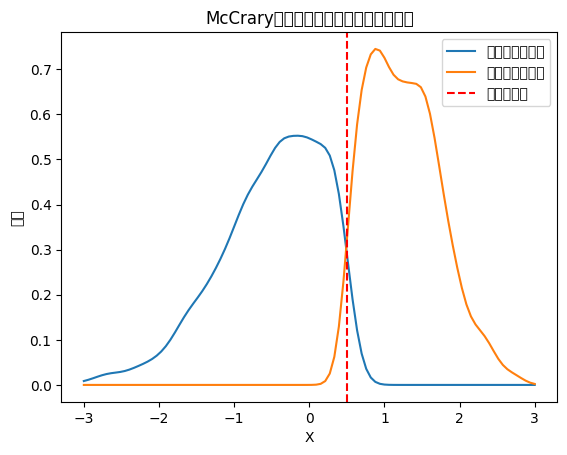

In [ ]:
# PythonでMcCraryの検定を実行するには、まずデータを準備します。
# 必要なライブラリをインポート
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.nonparametric.kde import KDEUnivariate


# デモ用のデータを生成
np.random.seed(0)
data = np.random.normal(loc=0, scale=1, size=1000)
data = np.append(data, np.random.normal(loc=1.5, scale=0.3, size=100)) # 境界の右側で密度を増加させます
print('データ:', data)


# 境界点を設定
cutoff = 0.5


# 境界の両側についてカーネル密度推定（KDE）を行う
kde_left = KDEUnivariate(data[data < cutoff])
kde_right = KDEUnivariate(data[data >= cutoff])
kde_left.fit(kernel='gau', bw='silverman', fft=True)
kde_right.fit(kernel='gau', bw='silverman', fft=True)


# 推定された密度を見てみる
print('左側の密度の推定値:', kde_left.density)
print('右側の密度の推定値:', kde_right.density)


# 境界での密度の差を計算
density_difference = kde_right.evaluate(cutoff) - kde_left.evaluate(cutoff)
print('境界での密度の差:', density_difference)


# 結果のプロット
x_grid = np.linspace(-3, 3, 100)
plt.plot(x_grid, kde_left.evaluate(x_grid), label='左側の推定密度')
plt.plot(x_grid, kde_right.evaluate(x_grid), label='右側の推定密度')
plt.axvline(x=cutoff, color='r', linestyle='--', label='カットオフ')
plt.legend()
plt.title('McCraryの検定における左右の密度推定')
plt.xlabel('X')
plt.ylabel('密度')
plt.show()

<h1 id="%E3%83%90%E3%83%A9%E3%83%B3%E3%82%B9%E3%83%86%E3%82%B9%E3%83%88">バランステスト</h1>

バランステスト（Balance Test）は、プログラムやデータの統計分析において、ランダム化実験や観測データの処理群と対照群の間に有意差があるかどうかを確認するために使用されます。通常、t-検定などを使用して、処理群と対照群の間の差があるかどうかを検定します。バランステストは、以下のように数式で表されます。


 $$ t = \frac{\bar{X}_1 - \bar{X}_2}{\sqrt{s^2(\frac{1}{n_1} + \frac{1}{n_2})}} $$


 ここで、$\bar{X}_1$ は処理群の平均、$\bar{X}_2$ は対照群の平均、$s^2$ は両群の分散の加重平均、$n_1$ と $n_2$ はそれぞれ処理群と対照群のサンプルサイズです。この数式は、通常、処理群と対照群の平均の差が偶然起こったものかどうかを検定するために使われます。Pythonで学ぶ効果検証入門においては、このバランステストを用いて、実験データの偏りを確認し、適切な分析を行うための手法を学びます。

In [ ]:
# Pythonでバランステストを実装する


import numpy as np
from scipy import stats


# 処理群と対照群のデータ
# ここではランダムに生成されたサンプルデータを使います


np.random.seed(0)


# 処理群のデータの平均（μ1 = 0.5）、標準偏差（σ = 1.0）、サイズ（n1 = 30）
data_treatment = np.random.normal(0.5, 1.0, 30)


# 対照群のデータの平均（μ2 = 0）、標準偏差（σ = 1.0）、サイズ（n2 = 30）
data_control = np.random.normal(0.0, 1.0, 30)


# 平均の算出
mean_treatment = np.mean(data_treatment) # 処理群の平均を計算
mean_control = np.mean(data_control) # 対照群の平均を計算


print('処理群の平均:', mean_treatment)
print('対照群の平均:', mean_control)


# 分散の算出
var_treatment = np.var(data_treatment, ddof=1) # 処理群の不偏分散を計算
var_control = np.var(data_control, ddof=1) # 対照群の不偏分散を計算


print('処理群の分散:', var_treatment)
print('対照群の分散:', var_control)


# サンプルサイズ
n_treatment = len(data_treatment) # 処理群のサンプルサイズ
n_control = len(data_control) # 対照群のサンプルサイズ


print('処理群のサンプルサイズ:', n_treatment)
print('対照群のサンプルサイズ:', n_control)


# バランステスト（t検定）の実行
# 仮説: 両群の平均に差がない（帰無仮説）
# 使用モード: 両側検定


# t検定の実行結果を取得
# t_statistic: 検定統計量のt値
# p_value: p値（帰無仮説が正しいと仮定したときに得られる観測データが得られる確率）
t_statistic, p_value = stats.ttest_ind(data_treatment, data_control)


print('検定統計量 t:', t_statistic)
print('p値:', p_value)


# 検定結果の解釈
if p_value < 0.05:
    print('対照群と処理群の間に統計的に有意な差があります。')
else:
    print('対照群と処理群の間に統計的に有意な差はありません。')

処理群の平均: 0.9428564472631747
対照群の平均: -0.2895218561539812
処理群の分散: 1.2107226246972504
対照群の分散: 0.8358320505829722
処理群のサンプルサイズ: 30
対照群のサンプルサイズ: 30
検定統計量 t: 4.718380879445557
p値: 1.5419378300001553e-05
対照群と処理群の間に統計的に有意な差があります。


<h1 id="Sharp+RDD">Sharp RDD</h1>

Sharp Regression Discontinuity Design（Sharp RDD、シャープRDD）は、特定の治療または介入があるしきい値を超えた結果で一貫して提供される状況で因果効果を推定するための手法です。数式で表すと以下のようになります。


 $$ Y_i = \alpha + \tau D_i + \beta X_i + \epsilon_i $$


 ここで、
 - $Y_i$ は被験者 $i$ のアウトカム変数（結果）です。
 - $\alpha$ は$Y_i$の切片、基礎的な影響や平均値です。
 - $\tau$ は $ au$ で表された介入の効果を示すパラメータです。
 - $D_i$ はしきい値を超えたときは1、それ以外は0で、介入が受けられたかを示す指示変数（ダミー変数）です。
 - $X_i$ は被験者 $i$ の共変量（制御変数）です。
 - $\epsilon_i$ はランダム誤差項を示します。


 Sharp RDDの目的は、しきい値を超えるかどうかを利用して因果推論を行うことです。Pythonで学ぶ効果検証入門では、プログラミングを通じてこのような因果推論手法を学びます。この手法は、教育や社会科学の研究における政策評価や介入の影響を評価するために使用されます。

X: [54.88135039 71.51893664 60.27633761 54.4883183  42.36547993 64.58941131
 43.75872113 89.17730008 96.36627605 38.34415188]
D: [1 1 1 1 0 1 0 1 1 0]
Y: [32.33897792 40.7787477  36.98776005 32.02999249 22.68372333 37.31605688
 22.96024712 49.78140389 52.81808281 19.38074839]
推定介入効果: 28.111341900671537


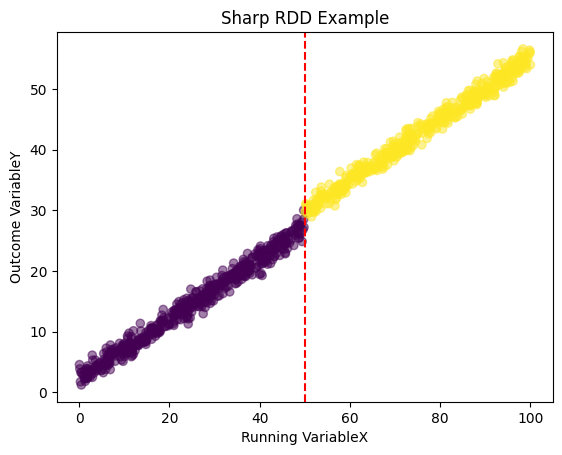

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


# サンプルデータの作成
np.random.seed(0)
N = 1000
X = np.random.uniform(0, 100, size=N) # 介入変数Xを一様分布に従い生成
print(f'X: {X[:10]}')


# しきい値を設定
threshold = 50


# 介入指示変数Dの生成
D = (X >= threshold).astype(int)
print(f'D: {D[:10]}')


# アウトカム変数Yの生成
# $ au$ は介入の平均効果、 $\epsilon$ は誤差項
alpha = 2
beta = 0.5
tau = 3
epsilon = np.random.normal(size=N)


Y = alpha + tau * D + beta * X + epsilon # アウトカム変数Yの生成
print(f'Y: {Y[:10]}')


# リニア回帰モデルで介入効果を推定
model = LinearRegression()
model.fit(D.reshape(-1, 1), Y)


# 介入効果の係数を出力
print(f'推定介入効果: {model.coef_[0]}')


# データプロット
plt.scatter(X, Y, alpha=0.5, c=D)
plt.axvline(x=threshold, color='r', linestyle='--')
plt.xlabel('Running VariableX')
plt.ylabel('Outcome VariableY')
plt.title('Sharp RDD Example')
plt.show()

<h1 id="Fuzzy+RDD">Fuzzy RDD</h1>

Fuzzy RDD（Fuzzy Regression Discontinuity Design）は、割当変数において明確な境界があるが、その境界付近で処置の導入が確率的であるような状況に対応する手法です。通常のRDD（Regression Discontinuity Design）では、処置が境界において明確に適用されるのに対し、Fuzzy RDDでは、境界での処置の適用が確率的になる点が異なります。\n\nこの設計では、処置の確率は割当変数が閾値に達したかどうかによって変動するモデルを考慮します。Fuzzy RDDの数式は以下のように表現されます：\n\n$$ E[Y_i | X_i] = \alpha + \tau D_i + \beta (X_i - c) + \epsilon_i $$\n\nここで：\n\n- $E[Y_i | X_i]$ は、割当変数 $X_i$ に条件付けた結果 $Y_i$ の期待値です。\n- $\alpha$ は切片で、介入効果のない場合の期待値に相当します。\n- $\tau$ は介入処置の効果を示します。\n- $D_i$ は介入処置が実際に適用されたかどうかを示す変数で、$D_i = 1$ の場合は処置が適用されています。\n- $X_i$ は割当変数で、介入の閾値 $c$ を持ちます。\n- $\beta (X_i - c)$ は割当変数の閾値からの距離に基づく調整項です。\n- $\epsilon_i$ は誤差項で、通常の誤差項の仮定が適用されます。\n\nFuzzy RDDを用いることで、処置のランダム化が完全でない状況でも、処置の効果を推定することが可能です。

X: [ 0.          0.2020202   0.4040404   0.60606061  0.80808081  1.01010101
  1.21212121  1.41414141  1.61616162  1.81818182  2.02020202  2.22222222
  2.42424242  2.62626263  2.82828283  3.03030303  3.23232323  3.43434343
  3.63636364  3.83838384  4.04040404  4.24242424  4.44444444  4.64646465
  4.84848485  5.05050505  5.25252525  5.45454545  5.65656566  5.85858586
  6.06060606  6.26262626  6.46464646  6.66666667  6.86868687  7.07070707
  7.27272727  7.47474747  7.67676768  7.87878788  8.08080808  8.28282828
  8.48484848  8.68686869  8.88888889  9.09090909  9.29292929  9.49494949
  9.6969697   9.8989899  10.1010101  10.3030303  10.50505051 10.70707071
 10.90909091 11.11111111 11.31313131 11.51515152 11.71717172 11.91919192
 12.12121212 12.32323232 12.52525253 12.72727273 12.92929293 13.13131313
 13.33333333 13.53535354 13.73737374 13.93939394 14.14141414 14.34343434
 14.54545455 14.74747475 14.94949495 15.15151515 15.35353535 15.55555556
 15.75757576 15.95959596 16.16161616 16.36363636

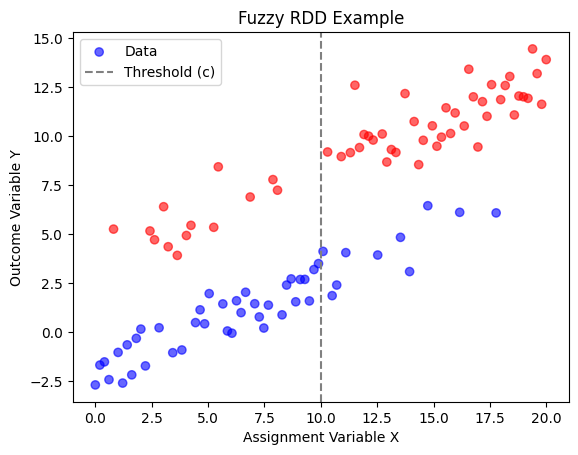

Estimated alpha (intercept): -1.8511299384510105
Estimated tau (treatment effect): 5.700263501233078
Estimated beta (slope): 0.4588023692551228


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


# データを生成します
# X: 割当変数、実際の観測データ
np.random.seed(42) # 乱数の種を固定
n = 100 # サンプル数
X = np.linspace(0, 20, n)
# c: 閾値
c = 10


# D: 処置の割り当て、閾値より大きければ確率的に処置を受ける
D = np.where(X >= c, np.random.binomial(1, 0.8, n), np.random.binomial(1, 0.2, n))


# 期待される処置効果
true_tau = 5


# Y: 結果変数、基礎の線形モデルとノイズで定義
Y = 3 + true_tau * D + 0.5 * (X - c) + np.random.normal(0, 1, n)


# 変数の出力
print("X:", X)
print("D:", D)
print("Y:", Y)


# データのプロット
plt.scatter(X, Y, c=D, cmap='bwr', alpha=0.6, label='Data')
plt.axvline(c, color='grey', linestyle='--', label='Threshold (c)')
plt.xlabel('Assignment Variable X')
plt.ylabel('Outcome Variable Y')
plt.title('Fuzzy RDD Example')
plt.legend()
plt.show()


# フィッティング
# 処置を考慮した線形モデルのフィッティング
X_reshaped = X.reshape(-1, 1) # 2次元配列に変形
model = LinearRegression().fit(np.hstack((X_reshaped, D.reshape(-1, 1))), Y)


# 結果の表示
alpha_hat = model.intercept_
tau_hat = model.coef_[1]
beta_hat = model.coef_[0]


print(f"Estimated alpha (intercept): {alpha_hat}")
print(f"Estimated tau (treatment effect): {tau_hat}")
print(f"Estimated beta (slope): {beta_hat}")

<h1 id="as-if+%E6%9D%A1%E4%BB%B6">as-if 条件</h1>

As-if条件は効果検証の際に特定の条件下での結果を推定するための仮定です。この仮定は、特定の処置や介入が行われた群と行われていない群において、それらが 'as if' 同じであったかのように扱うことができることを意味します。数学的には、特定の削減効果や処置の無相関性が仮定されます。


 $$ E[Y(0) | T=1] = E[Y(0) | T=0] $$


 この式は、処置群 $T=1$ と対照群 $T=0$ の介入なしの潜在結果 $Y(0)$ の平均が等しいことを示します。ここでの $E$ は期待値を表し、$Y(0)$ は介入が行われなかった場合の結果変数を示します。また、$T$ は処置または介入を意味し、$T=1$ は処置が行われたことを、$T=0$ は行われていないことを示します。


 Pythonで学ぶ効果検証入門では、これらの仮定を用いて、実際のデータで処置の効果を統計的に推定するための方法を学ぶことができます。as-if条件は、このような推定が正確で有効であるための重要な前提条件の一つです。

In [ ]:
# Pythonでは、データを用いてas-if条件を検証するために、回帰やマッチングなどの手法を使います。
import numpy as np
import pandas as pd


# サンプルデータを生成します。
data = {
    'treatment': np.random.randint(0, 2, 100),  # 0または1の処置変数
    'outcome': np.random.normal(0, 1, 100)  # 正規分布に従う結果変数
}
df = pd.DataFrame(data)


# 処置群と対照群の平均を比較してみます。
treatment_group = df[df['treatment'] == 1]['outcome']
control_group = df[df['treatment'] == 0]['outcome']


# 処置群の平均値を出力します。
print('Treatment group mean:', treatment_group.mean())


# 対照群の平均値を出力します。
print('Control group mean:', control_group.mean())


# このようにして、実際に得られたデータの処置および対照群の平均結果を比較します。
# マッチングや回帰を用いる場合もありますが、基本はサンプル内のas-if条件を見つけることが重要です。

Treatment group mean: 0.07962521629423436
Control group mean: 0.1437761099908456


<h1 id="%E5%AF%86%E5%BA%A6%E9%96%A2%E6%95%B0">密度関数</h1>

密度関数は、ある確率分布において特定の値が取られる確率の密度を表す関数です。連続型の確率分布では、確率密度関数 (Probability Density Function, PDF) として表現されます。連続確率変数 $X$ の確率密度関数 $f(x)$ について、任意の $a \leq x \leq b$ に対して
 $$
 P(a \leq X \leq b) = \int_{a}^{b} f(x) \, dx
 $$
 として定義され、ここで $P$ は確率を表し、$\int$ は積分記号を表します。$a$ と $b$ は積分の範囲で、$f(x)$ は密度関数そのものです。この関数が示すのは、確率変数がある範囲にある確率です。


 また、密度関数は常に正で、密度関数全体を積分すると1になります。これが、全体の確率が1であるとする基本ルールに一致します。


 This is a key component when learning about effect measurement in Python, as described in "Pythonで学ぶ効果検証入門". Here, understanding probability density functions can help in modeling real-world data and in performing statistical inference.

[-3.00000000e+00 -2.99000000e+00 -2.98000000e+00 -2.97000000e+00
 -2.96000000e+00 -2.95000000e+00 -2.94000000e+00 -2.93000000e+00
 -2.92000000e+00 -2.91000000e+00 -2.90000000e+00 -2.89000000e+00
 -2.88000000e+00 -2.87000000e+00 -2.86000000e+00 -2.85000000e+00
 -2.84000000e+00 -2.83000000e+00 -2.82000000e+00 -2.81000000e+00
 -2.80000000e+00 -2.79000000e+00 -2.78000000e+00 -2.77000000e+00
 -2.76000000e+00 -2.75000000e+00 -2.74000000e+00 -2.73000000e+00
 -2.72000000e+00 -2.71000000e+00 -2.70000000e+00 -2.69000000e+00
 -2.68000000e+00 -2.67000000e+00 -2.66000000e+00 -2.65000000e+00
 -2.64000000e+00 -2.63000000e+00 -2.62000000e+00 -2.61000000e+00
 -2.60000000e+00 -2.59000000e+00 -2.58000000e+00 -2.57000000e+00
 -2.56000000e+00 -2.55000000e+00 -2.54000000e+00 -2.53000000e+00
 -2.52000000e+00 -2.51000000e+00 -2.50000000e+00 -2.49000000e+00
 -2.48000000e+00 -2.47000000e+00 -2.46000000e+00 -2.45000000e+00
 -2.44000000e+00 -2.43000000e+00 -2.42000000e+00 -2.41000000e+00
 -2.40000000e+00 -2.39000

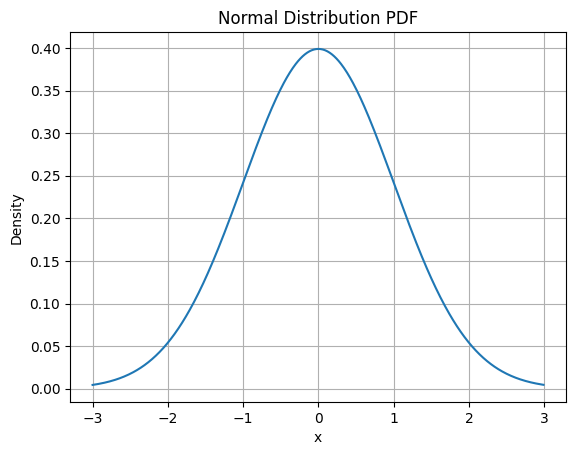

In [ ]:
# 密度関数をPythonで実装


import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm


# 正規分布の平均(mean)と標準偏差(std)を設定
mu, sigma = 0, 1


# xの範囲を設定。ここでは-3から3までの範囲を0.01刻みで設定
x = np.arange(-3, 3, 0.01)
print(x)


# scipyのnorm.pdfを用いて正規分布の確率密度関数を計算
pdf = norm.pdf(x, mu, sigma)
print(pdf)


# 確率密度関数をプロット
gf = plt.figure()
plt.plot(x, pdf, label='PDF')
plt.title('Normal Distribution PDF')
plt.xlabel('x')
plt.ylabel('Density')
plt.grid(True)
plt.show()


# このコードスニペットでは、
# 1. numpyで0.01間隔のx軸の値を生成し、配列に設定しています。
# 2. scipyライブラリのnorm.pdfを使用してこれらの値に対する正規分布の確率密度を計算しています。
# 3. matplotlibを用いて、計算した確率密度をプロットし、その分布を視覚化しています。

<h1 id="diagnostic+tests">diagnostic tests</h1>

効果検証における診断テスト（diagnostic tests）は、ある条件が満たされているかどうかを確認するための手法の一つです。これらのテストの主な目的は、データの信頼性とモデルの適切性を確保することです。通常、これには統計モデルの仮定の検証が含まれます。特に、回帰分析やその他のモデリング手法において、残差の正規性、ホモスケダスティシティ、独立性などを検証することが一般的です。


 理論的には、diagnostic testsはいくつかの統計的な検定に基づいています。例えば、ホモスケダスティシティ（等分散性）を検証するためのBreusch-Pagan検定や、データの正規性を検証するためのShapiro-Wilk検定などです。


 以下にBreusch-Pagan検定の理論を数式で示します。Breusch-Pagan検定は、次のように$


 R^2


 $（決定係数）を用いて表現されます：


 $$


 BP = n \cdot R^2


 $$


 ここで、$BP$はBreusch-Paganの検定統計量、$n$はサンプルサイズ、$R^2$は余剰分散を独立変数の関数として回帰したときの決定係数です。 $R^2$はモデルがどの程度のデータの変動を説明できるかを示す指標です。


 この統計量は$


 \chi^2


 $分布に従います。この事実を利用して、$BP$がある閾値を超えるかどうかによって、ホモスケダスティシティ（等分散性）の仮定が棄却されるかを判断します。


 次にPythonでこれを実装するコードを示します。

In [ ]:
# 必要なライブラリをインポートします。
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan


# ダミーデータを生成します。
np.random.seed(0) # 再現性のためにシードを設定
X = np.random.rand(100, 2) # 100 x 2 のランダムデータを生成
beta = np.array([1, 0.5]) # 真のパラメータを設定
epsilon = np.random.normal(size=100) # 正規分布に従う誤差項を生成
y = X @ beta + epsilon # 線形モデルのデータを生成


# 変数の内容を確認します。
print("X:", X[:5]) # Xの最初の5行を出力
y = sm.add_constant(y) # 切片を追加


print("被説明変数y:", y[:5]) # 被説明変数yの最初の5行を出力


# モデルをフィットします。
model = sm.OLS(y, X) # OLS回帰モデルを定義
results = model.fit() # モデルをフィッティング


# Breusch-Pagan検定を実行します。
# 残差と独立変数で検定を行います。
bptest = het_breuschpagan(results.resid, results.model.exog)


# 検定統計量やp値を出力します。
print('BP統計量:', bptest[0]) # Breusch-Pagan検定統計量
print('自由度:', bptest[2]) # 検定の自由度
print('p値:', bptest[1]) # 検定のp値


# 結果を解釈します。
if bptest[1] < 0.05:
    print('帰無仮説を棄却します。ホモスケダスティシティがない可能性があります。')
else:
    print('帰無仮説を棄却できません。ホモスケダスティシティがあります。')

<h1 id="%E5%87%A6%E7%BD%AE%E7%A2%BA%E7%8E%87">処置確率</h1>

### 処置確率（Propensity Score）の解説


 処置確率とは、ある個体が特定の処置を受ける確率のことを指します。これは、よく因果推論において用いられるコンセプトで、ランダム化試験を模倣するための手法の一つです。


 Propensity Scoreは数式で以下のように表現されます:


 $$ e(x) = P(T = 1 | X = x) $$


 ここで、
 - $e(x)$ は処置確率（Propensity Score）です。
 - $P(T = 1 | X = x)$ は、特徴量ベクトル $X = x$ において、処置 $T = 1$ となる条件付き確率を表します。


 このスコアは、推定において補正を行うために使われ、主にマッチングやストラティフィケーション、逆確率重み付け法などに活用されます。処置効果の正確な推定を目的としています。


 『Pythonで学ぶ効果検証入門』においても、Propensity Scoreは重要な役割を果たし、データにおける偏りを調整するために使用されます。

In [ ]:
# Propensity Scoreの計算をPythonで実装


import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression


# ダミーデータの生成
np.random.seed(0)
X = np.random.normal(size=(100, 5)) # 特徴量データ（100行5列）
T = np.random.binomial(1, 0.5, size=100) # 処置のデータ（0または1）


# 処置のデータの確認
print("特徴量データ（X）:", X)
print("処置データ（T）:", T)


# ロジスティック回帰モデルの構築
model = LogisticRegression()


# 処置データを予測するために特徴量データに基づいてモデルを適合させる
model.fit(X, T) # 特徴量Xから処置Tを予測するためのモデルを適合させる


# 処置確率の予測
propensity_scores = model.predict_proba(X)[:, 1] # 処置1の確率を取得


# 処置確率の出力
print("処置確率:", propensity_scores)


# 処置確率は、特徴量が与えられたときに処置が行われる確率を表し、
# 因果推論における偏りを調整するために使用される。

特徴量データ（X）: [[ 1.76405235  0.40015721  0.97873798  2.2408932   1.86755799]
 [-0.97727788  0.95008842 -0.15135721 -0.10321885  0.4105985 ]
 [ 0.14404357  1.45427351  0.76103773  0.12167502  0.44386323]
 [ 0.33367433  1.49407907 -0.20515826  0.3130677  -0.85409574]
 [-2.55298982  0.6536186   0.8644362  -0.74216502  2.26975462]
 [-1.45436567  0.04575852 -0.18718385  1.53277921  1.46935877]
 [ 0.15494743  0.37816252 -0.88778575 -1.98079647 -0.34791215]
 [ 0.15634897  1.23029068  1.20237985 -0.38732682 -0.30230275]
 [-1.04855297 -1.42001794 -1.70627019  1.9507754  -0.50965218]
 [-0.4380743  -1.25279536  0.77749036 -1.61389785 -0.21274028]
 [-0.89546656  0.3869025  -0.51080514 -1.18063218 -0.02818223]
 [ 0.42833187  0.06651722  0.3024719  -0.63432209 -0.36274117]
 [-0.67246045 -0.35955316 -0.81314628 -1.7262826   0.17742614]
 [-0.40178094 -1.63019835  0.46278226 -0.90729836  0.0519454 ]
 [ 0.72909056  0.12898291  1.13940068 -1.23482582  0.40234164]
 [-0.68481009 -0.87079715 -0.57884966 -0.311

<h1 id="%E5%8F%B3%E5%81%B4%E6%A5%B5%E9%99%90">右側極限</h1>

右側極限は、ある点における関数の挙動を、その点の右側（あるいは正の方向）から接近することによって調べる概念です。数学的には、次のように表現されます。
 $$ \lim_{x \to a^+} f(x) $$
 ここで、$\lim$は「極限」を示します。$x \to a^+$は、「$x$が$a$に右側から（または正の方向から）近づく」ということを意味しています。$f(x)$は$x$の関数です。


 右側極限は、特に不連続な関数や区分線形関数の挙動を理解する際に重要であり、関数が点$a$で右側からどのように振る舞うかを示します。例えば、Pythonで学ぶ効果検証分野では、挙動の異なるデータポイントの変化（例：介入効果の開始点）を調べるのに役立つことがあります。

In [ ]:
# 必要なライブラリをインポートします
import numpy as np


# 関数f(x)を定義します
def f(x):
    return np.where(x < 1, 2*x, 3*x + 1) # xが1未満のときは2x、それ以外は3x+1を返す関数


# xが1に右から近づくときのf(x)の様子を観察します
x_values = np.linspace(1, 2, 100, endpoint=False) # 1から2までの範囲で1に近づく100異なるx値を生成
print(x_values) # 生成されたx値を出力します


# 各xに対するf(x)を計算します
y_values = f(x_values)
print(y_values) # 計算されたy値を出力します


# 極限値を近似します
right_limit = y_values[0] # 1に右から最も近い点でのf(x)の値を取る
print('右側極限の近似値:', right_limit) # 極限の近似値を出力します

[1.   1.01 1.02 1.03 1.04 1.05 1.06 1.07 1.08 1.09 1.1  1.11 1.12 1.13
 1.14 1.15 1.16 1.17 1.18 1.19 1.2  1.21 1.22 1.23 1.24 1.25 1.26 1.27
 1.28 1.29 1.3  1.31 1.32 1.33 1.34 1.35 1.36 1.37 1.38 1.39 1.4  1.41
 1.42 1.43 1.44 1.45 1.46 1.47 1.48 1.49 1.5  1.51 1.52 1.53 1.54 1.55
 1.56 1.57 1.58 1.59 1.6  1.61 1.62 1.63 1.64 1.65 1.66 1.67 1.68 1.69
 1.7  1.71 1.72 1.73 1.74 1.75 1.76 1.77 1.78 1.79 1.8  1.81 1.82 1.83
 1.84 1.85 1.86 1.87 1.88 1.89 1.9  1.91 1.92 1.93 1.94 1.95 1.96 1.97
 1.98 1.99]
[4.   4.03 4.06 4.09 4.12 4.15 4.18 4.21 4.24 4.27 4.3  4.33 4.36 4.39
 4.42 4.45 4.48 4.51 4.54 4.57 4.6  4.63 4.66 4.69 4.72 4.75 4.78 4.81
 4.84 4.87 4.9  4.93 4.96 4.99 5.02 5.05 5.08 5.11 5.14 5.17 5.2  5.23
 5.26 5.29 5.32 5.35 5.38 5.41 5.44 5.47 5.5  5.53 5.56 5.59 5.62 5.65
 5.68 5.71 5.74 5.77 5.8  5.83 5.86 5.89 5.92 5.95 5.98 6.01 6.04 6.07
 6.1  6.13 6.16 6.19 6.22 6.25 6.28 6.31 6.34 6.37 6.4  6.43 6.46 6.49
 6.52 6.55 6.58 6.61 6.64 6.67 6.7  6.73 6.76 6.79 6.82 6.85 6.88

<h1 id="%E5%B7%A6%E5%81%B4%E6%A5%B5%E9%99%90">左側極限</h1>

### 左側極限の解説


 左側極限とは、ある関数がある点においてその点の直前でどのような挙動を見せるかを測るための概念です。数式で示すと次のようになります：


 $$ \lim_{{x \to a^-}} f(x) $$


 ここで、$\lim$は極限を示し、$x \to a^-$は$x$が$a$に近づくが$a$より小さい値から近づくことを示しています。


 この理論は多くの応用に用いることができ、特に不連続な点を持つ関数の振る舞いを理解するために重要です。
 'Pythonで学ぶ効果検証入門'においては、左側極限を活用することでデータ分析や予測モデルの挙動をより詳しく解析する手段として使うことができます。

In [ ]:
# 左側極限を計算するPythonコード
import numpy as np


# 定義される関数 f(x)
def f(x):
    return x ** 2 # 二乗関数として定義


# xがaより小さいところから近づくような範囲を設定
a = 1.0 # 計算したい点を1に設定
x_values = np.linspace(a - 0.1, a, 100, endpoint=False) # aの左側で徐々に接近


# 左側極限の近似値を求める
left_limit = np.mean([f(x) for x in x_values])


# 結果を出力
print("x_values:", x_values) # xの値を出力
print("left_limit:", left_limit) # 左側極限の近似値を出力


# 関数 f(x) は与えられた x に対して x^2 を返す関数
# ここでは f(x) を a よりすこし小さい範囲で計算し、左側極限を求めます
# x_values は a の左側に詰まった点のリストを生成しています
# left_limit はそれらの点に対して f(x) の平均を取ることで左側極限を近似的に求めています

x_values: [0.9   0.901 0.902 0.903 0.904 0.905 0.906 0.907 0.908 0.909 0.91  0.911
 0.912 0.913 0.914 0.915 0.916 0.917 0.918 0.919 0.92  0.921 0.922 0.923
 0.924 0.925 0.926 0.927 0.928 0.929 0.93  0.931 0.932 0.933 0.934 0.935
 0.936 0.937 0.938 0.939 0.94  0.941 0.942 0.943 0.944 0.945 0.946 0.947
 0.948 0.949 0.95  0.951 0.952 0.953 0.954 0.955 0.956 0.957 0.958 0.959
 0.96  0.961 0.962 0.963 0.964 0.965 0.966 0.967 0.968 0.969 0.97  0.971
 0.972 0.973 0.974 0.975 0.976 0.977 0.978 0.979 0.98  0.981 0.982 0.983
 0.984 0.985 0.986 0.987 0.988 0.989 0.99  0.991 0.992 0.993 0.994 0.995
 0.996 0.997 0.998 0.999]
left_limit: 0.9023835000000001


<h1 id="%E5%B1%80%E6%89%80%E5%A4%9A%E9%A0%85%E5%BC%8F%E5%9B%9E%E5%B8%B0">局所多項式回帰</h1>

### 局所多項式回帰 (Local Polynomial Regression)


 局所多項式回帰は、回帰分析の一種で、特に非線形なデータのトレンドを滑らかに近似するために使用されます。この手法は、指定した点付近のデータに重みを与え、その部分だけで多項式回帰を行うことで、全体の関係性を滑らかに捉えます。


 局所多項式回帰の数式は次のように表されます。局所多項式回帰では、重み付きの最小二乗法を使って近似関数 $\hat{f}(x)$ を求めます。


 $$
 \hat{f}(x) = \sum_{i=1}^{n} W(x, x_i) \cdot (\alpha_0 + \alpha_1 (x_i - x) + \alpha_2 (x_i - x)^2 + \ldots )
 $$


 ここで、
 - $n$ はデータポイントの数。
 - $W(x, x_i)$ は基準点 $x$ の周りでのデータポイント $x_i$ への重み。
 - $\alpha_0, \alpha_1, \alpha_2, \ldots$ は回帰係数。


 ### 記号の解説
 - $x$: 回帰を行う基準点。
 - $x_i$: データポイント。
 - $W(x, x_i)$: 重み関数。基準点 $x$ の周りの $x_i$ に依存した重みを付けます。一般的にはガウスカーネルを用いることが多いです。


 ### 使用用途
 局所多項式回帰は、データの非線形性を捉えるのに有効で、特に変化が激しいデータのスムージングに適しています。


 ### Pythonで学ぶ効果検証入門との関係性
 この手法は因果推論においても用いられ、例えば政策の効果を滑らかに推定する際に使用されることがあります。

<h1 id="%E5%B1%80%E6%89%80%E7%B7%9A%E5%BD%A2%E5%9B%9E%E5%B8%B0">局所線形回帰</h1>

### 局所線形回帰の解説


 局所線形回帰（Local Linear Regression）は、データの局所的な領域で線形のモデルを用いて回帰を行う手法です。非線形なデータに対して、データ全体をカバーする1つの線形モデルを用いる代わりに、各データポイントの近傍で線形回帰を行います。


 #### 局所線形回帰の数式


 局所線形回帰では、任意の点 $x_0$ における推定値 $\hat{y}_0$ は次の数式で表されます。


 $$
 \hat{y}_0 = \alpha + \beta(x_0 - x) = \sum_{i=1}^{n}{w_i(y_i - (\alpha + \beta(x_0 - x_i)))}
 $$


 - $w_i$: 各データ点 $x_i$ に対する重み。通常はカーネル関数を用いて計算され、近傍の点がより高い重みを持ちます。
 - $y_i$: データ点 $x_i$ に対する観測値。
 - $lpha, eta$: 切片と傾きで、推定したいパラメータです。


 ### 使用用途


 局所線形回帰は次のような場合に有用です：
 - データの局所的な構造を捉える必要があるとき。
 - データの非線形性が強く、全体を統一した線形モデルが不適切なとき。


 この手法は、局所的な構造を詳細に捉えることで、より精緻な機械学習モデルを構築するための前処理としても利用されます。

X: [5.48813504 7.15189366 6.02763376 5.44883183 4.23654799 6.45894113
 4.37587211 8.91773001 9.63662761 3.83441519 7.91725038 5.2889492
 5.68044561 9.25596638 0.71036058 0.871293   0.20218397 8.32619846
 7.78156751 8.70012148 9.78618342 7.99158564 4.61479362 7.80529176
 1.18274426 6.39921021 1.43353287 9.44668917 5.21848322 4.1466194
 2.64555612 7.74233689 4.56150332 5.68433949 0.187898   6.17635497
 6.12095723 6.16933997 9.43748079 6.81820299 3.59507901 4.37031954
 6.97631196 0.60225472 6.66766715 6.7063787  2.10382561 1.28926298
 3.15428351 3.63710771 5.7019677  4.38601513 9.88373838 1.02044811
 2.08876756 1.61309518 6.53108325 2.53291603 4.66310773 2.44425592
 1.58969584 1.10375141 6.56329589 1.38182951 1.96582362 3.68725171
 8.2099323  0.97101276 8.37944907 0.96098408 9.76459465 4.68651202
 9.76761088 6.0484552  7.39263579 0.39187792 2.82806963 1.20196561
 2.96140198 1.18727719 3.17983179 4.14262995 0.64147496 6.92472119
 5.66601454 2.65389491 5.23248053 0.93940511 5.75946496 9.292

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 23616 (\N{CJK UNIFIED IDEOGRAPH-5C40}) missing from font(s) DejaVu Sans.
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25152 (\N{CJK UNIFIED IDEOGRAPH-6240}) missing from font(s) DejaVu Sans.
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 32218 (\N{CJK UNIFIED IDEOGRAPH-7DDA}) missing from font(s) DejaVu Sans.
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24418 (\N{CJK UNIFIED IDEOGRAPH-5F62}) missing from font(s) DejaVu Sans.
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22238 (\N{CJK UNIFIED IDEOGRAPH-56DE}) missing from font(s) DejaVu Sans.
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24112 (\N{CJK UNIFIED IDEOGRAPH-5E30}) missing from font(s) DejaVu Sans.
/usr/local/lib/p

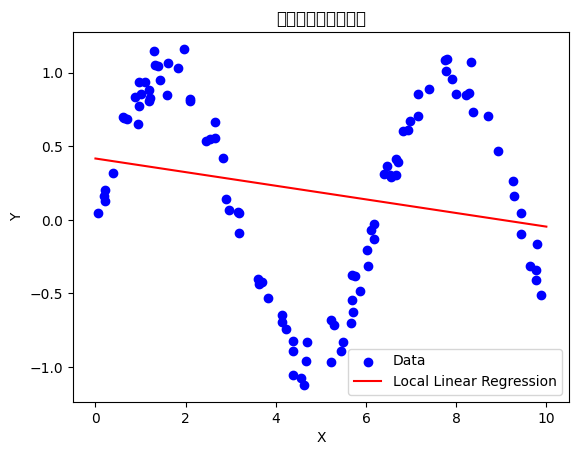

In [ ]:
# 局所線形回帰をPythonで実装するには、numpyやscikit-learnなどのライブラリを使用します。


import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity


# サンプルデータを生成します。
np.random.seed(0)
X = np.random.rand(100) * 10 # 0から10までの一様乱数
Y = np.sin(X) + np.random.randn(100) * 0.1 # sin関数にノイズを加えたもの


# データを確認します。
print("X:", X)
print("Y:", Y)


# カーネル密度推定を用いて、各点での局所的な重みを計算します。
kde = KernelDensity(kernel='gaussian', bandwidth=1.0).fit(X[:, np.newaxis]) # Xを2D配列に変換


# 評価点を生成します。
x_eval = np.linspace(0, 10, 1000)


# 各評価点での重みを計算します。
log_dens = kde.score_samples(x_eval[:, np.newaxis])
weights = np.exp(log_dens)


# 重みを確認します。
print("weights:", weights)


# 各評価点での局所線形回帰を実行します。
y_eval = np.zeros_like(x_eval)
for i, x0 in enumerate(x_eval):
    # 重みを使って線形回帰をフィット
    W = np.diag(weights[i] * np.ones_like(X)) # 対角行列にする
    X_with_intercept = np.vstack([np.ones_like(X), X]).T # 切片用に1を追加
    # 通常の線形回帰の最小二乗法で解を求める
    beta = np.linalg.inv(X_with_intercept.T @ W @ X_with_intercept) @ (X_with_intercept.T @ W @ Y)
    # x0 における予測値を計算
    y_eval[i] = beta[0] + beta[1] * x0


# 推定されたy_evalを確認します。
print("y_eval:", y_eval)


# 結果をプロットします。
plt.scatter(X, Y, c='blue', label='Data')
plt.plot(x_eval, y_eval, c='red', label='Local Linear Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('局所線形回帰の結果')
plt.legend()
plt.show()

<h1 id="%E7%B7%9A%E5%BD%A2%E3%83%A2%E3%83%87%E3%83%AB">線形モデル</h1>

線形モデル（例えば、単回帰分析）は、予測変数（独立変数）と目的変数（従属変数）との間の関係を記述するための統計的手法です。線形モデルは次のように数式で表されます：


 $$y = eta_0 + eta_1 x + \epsilon$$


 ここで：
 - $y$ は目的変数（従属変数）
 - $eta_0$ は切片（定数項）
 - $eta_1$ は傾き（回帰係数）
 - $x$ は予測変数（独立変数）
 - $\epsilon$ は誤差項です。


 線形モデルはデータセットが直線的な関係を持つ場合に使用され、一般的には回帰分析の分野で使われます。例えば、Pythonを使った効果検証では、変数間の関係をモデル化し予測するために使われます。

In [ ]:
%%capture
!pip install japanize-matplotlib

独立変数 x: [1 2 3 4 5]
従属変数 y: [2 4 5 4 5]
回帰係数 β1: 0.6
切片 β0: 2.2
予測値 y_pred: [2.8 3.4 4.  4.6 5.2]


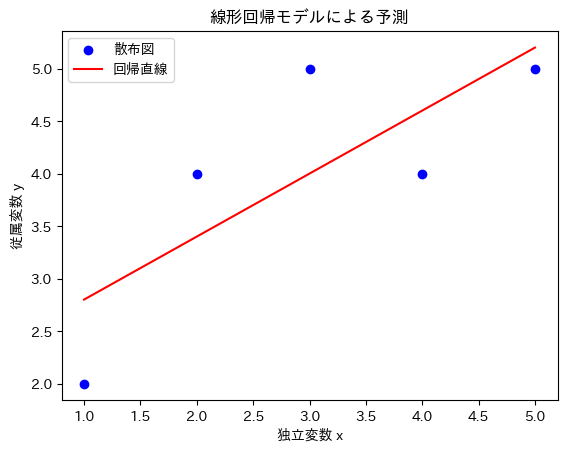

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
from sklearn.linear_model import LinearRegression


# ダミーデータの作成（独立変数 x と従属変数 y）
x = np.array([1, 2, 3, 4, 5]) # 独立変数
print('独立変数 x:', x) # xの中身の確認
y = np.array([2, 4, 5, 4, 5]) # 従属変数
print('従属変数 y:', y) # yの中身の確認


# 2Dの配列に変換（scikit-learnが望む形式）
x = x.reshape(-1, 1)


# 線形回帰モデルの初期化
model = LinearRegression()


# モデルの学習
model.fit(x, y)


# 傾き（回帰係数）と切片を取得
beta_1 = model.coef_[0]
print('回帰係数 β1:', beta_1) # β1の確認
beta_0 = model.intercept_
print('切片 β0:', beta_0) # β0の確認


# 学習データに対する予測
y_pred = model.predict(x)
print('予測値 y_pred:', y_pred) # y_predの確認


# 散布図と回帰直線の描画
plt.scatter(x, y, color='blue', label='散布図')
plt.plot(x, y_pred, color='red', label='回帰直線')
plt.xlabel('独立変数 x')
plt.ylabel('従属変数 y')
plt.legend()
plt.title('線形回帰モデルによる予測')
plt.show()

<h1 id="%E3%83%90%E3%83%AA%E3%82%A2%E3%83%B3%E3%82%B9">バリアンス</h1>

### バリアンスについての解説


 バリアンス（分散）は、データのばらつきを表す指標の一つであり、統計や機械学習の分野で頻繁に利用されます。データが平均値からどの程度離れているのかを表す尺度として役立ちます。


 **バリアンスの数式**


 バリアンスは以下の数式で計算されます：


 $$ \sigma^2 = \frac{1}{N} \sum_{i=1}^{N} (x_i - \mu)^2 $$


 この数式の各記号の解説:
 - $\sigma^2$: バリアンスを表します。
 - $N$: データセットの総数を表します。
 - $x_i$: 個々のデータ点を表します。
 - $\mu$: データセットの平均値を表します。
 - $\sum$: シグマ記号で和を計算することを示します。


 **バリアンスの使用用途**
 - データのばらつきを評価する際に使用されます。
 - モデルの予測精度の指標としても使われる場合があります。
 - 機械学習モデルのハイパーパラメータの最適化において、過学習と未学習の評価にも利用されます。


 **Pythonで学ぶ効果検証入門との関係性**


 この書籍では、バリアンスを中心とした統計検定や効果量の測定について実践的なコード例を提供し、バリアンスがどのように実際のデータ解析で利用されるかを解説しています。

In [ ]:
# データセット
import numpy as np


data = [10, 12, 23, 23, 16, 23, 21, 16]


# データセットの総数 N を計算
N = len(data)
print(f'N: {N}') # N: データセットの総数


# データセットの平均値 μ を計算
mean = np.mean(data)
print(f'mean (μ): {mean}') # mean: データセットの平均 μ


# バリアンス σ^2 を計算
variance = np.sum((np.array(data) - mean) ** 2) / N
print(f'variance (σ^2): {variance}') # variance: データセットのバリアンス σ^2

N: 8
mean (μ): 18.0
variance (σ^2): 24.0


<h1 id="%E6%BD%9C%E5%9C%A8%E3%82%B9%E3%82%B3%E3%82%A2">潜在スコア</h1>

潜在スコア（Propensity Score）は、観察研究において処置群と対照群のバランスを取るために使われる統計的手法です。これにより、観察データを用いて因果関係を推定する際のバイアスを減らすことができます。潜在スコアは、処置を受ける確率をモデル化し、そのスコアを基にマッチングや重み付けを行います。


 潜在スコアは数式で以下のように表現されます。


 $$ e(x) = P(T = 1 \mid X = x) $$


 ここで、$e(x)$ は潜在スコアを示し、$P(T = 1 \mid X = x)$ は共変量 $x$ に基づいて処置を受ける確率です。
 - $T$ : 処置変数（$T=1$ は処置群、$T=0$ は対照群を示します。）
 - $X$ : 共変量ベクトル。


 この手法を用いることで、処置の効果をより適切に推定できます。例えば、医療データにおける治療効果の検証や、マーケティングデータにおけるキャンペーン効果の測定などで使われます。


 『Pythonで学ぶ効果検証入門』では、このような因果推論の手法が実践的な例とともに紹介されています。潜在スコアの概念は、その中でも重要な要素の一つとして取り扱われています。

In [ ]:
# ライブラリのインポート
import numpy as np
from sklearn.linear_model import LogisticRegression


# ダミーデータの作成
np.random.seed(0) # 乱数シードの設定
n = 100 # データ数
X = np.random.normal(size=(n, 2)) # 共変量としての2次元データを生成
T = (np.random.rand(n) < 0.5).astype(int) # 0または1の処置を適当に設定


# 共変量と処置変数を表示
print("共変量 X:\n", X)
print("処置変数 T:\n", T)


# ロジスティック回帰モデルの初期化
model = LogisticRegression()


# ロジスティック回帰を用いた潜在スコアの推定
model.fit(X, T) # モデルの学習
propensity_score = model.predict_proba(X)[:, 1] # 潜在スコアの取得（処置群の確率）


# 潜在スコアの表示
print("潜在スコア e(x):\n", propensity_score)


# このコードでは、2次元の共変量 X を用いて、処置変数 T をロジスティック回帰モデルで推定します。
# sklearn の LogisticRegression を用いて、各サンプルが処置を受ける確率（潜在スコア）を計算します。

共変量 X:
 [[ 1.76405235  0.40015721]
 [ 0.97873798  2.2408932 ]
 [ 1.86755799 -0.97727788]
 [ 0.95008842 -0.15135721]
 [-0.10321885  0.4105985 ]
 [ 0.14404357  1.45427351]
 [ 0.76103773  0.12167502]
 [ 0.44386323  0.33367433]
 [ 1.49407907 -0.20515826]
 [ 0.3130677  -0.85409574]
 [-2.55298982  0.6536186 ]
 [ 0.8644362  -0.74216502]
 [ 2.26975462 -1.45436567]
 [ 0.04575852 -0.18718385]
 [ 1.53277921  1.46935877]
 [ 0.15494743  0.37816252]
 [-0.88778575 -1.98079647]
 [-0.34791215  0.15634897]
 [ 1.23029068  1.20237985]
 [-0.38732682 -0.30230275]
 [-1.04855297 -1.42001794]
 [-1.70627019  1.9507754 ]
 [-0.50965218 -0.4380743 ]
 [-1.25279536  0.77749036]
 [-1.61389785 -0.21274028]
 [-0.89546656  0.3869025 ]
 [-0.51080514 -1.18063218]
 [-0.02818223  0.42833187]
 [ 0.06651722  0.3024719 ]
 [-0.63432209 -0.36274117]
 [-0.67246045 -0.35955316]
 [-0.81314628 -1.7262826 ]
 [ 0.17742614 -0.40178094]
 [-1.63019835  0.46278226]
 [-0.90729836  0.0519454 ]
 [ 0.72909056  0.12898291]
 [ 1.13940068 -1.234

<h1 id="%E5%85%B1%E5%A4%89%E9%87%8F%E3%81%AE%E3%83%90%E3%83%A9%E3%83%B3%E3%82%B9%E3%83%86%E3%82%B9%E3%83%88">共変量のバランステスト</h1>

### 共変量のバランステスト


 共変量のバランステストは、処理群と対照群の間で共変量（例えば、年齢、性別、収入などの観測可能な特徴量）の分布が類似しているかどうかを統計的に検定する方法です。これを確認することで、処置や介入の効果がその共変量の違いによるものではなく、実際の処置によるものであると判断できます。


 数式としては、平均値の差を検定する手段により、例えば次のように表現できます。


 $$
 H_0: \mu_{トリートメント} = \mu_{コントロール}
 $$


 ここで、$H_0$ は帰無仮説を表し、$\mu_{トリートメント}$ および $\mu_{コントロール}$ はそれぞれ処理群と対照群の共変量の平均を表します。帰無仮説 $H_0$ の下で、有意な差がないことを示します。


 このテストの具体的な実施方法にはt検定やカイ二乗検定などがあります。この手法は、処理と結果の関係性が共変量に依存しないことを確認するために使用されます。


 Pythonで実装する際は、ライブラリ `scipy` や `statsmodels` を使うことが一般的です。また、このようなバランステストは「Pythonで学ぶ効果検証入門」でも取り扱われており、介入の前後でのデータの正当性を担保する際に重要なステップと言えます。

In [ ]:
# Pythonで共変量のバランステストをする際のコード例


import numpy as np # 数値計算用ライブラリをインポート
from scipy import stats # 統計的な計算のためにscipyからstatsをインポート


# サンプルデータの生成：トリートメント群とコントロール群
np.random.seed(0) # ランダムシードを設定して結果を再現可能に


# トリートメント群の共変量データ（例：年齢）を正規分布に従って生成
covariate_treatment = np.random.normal(loc=30, scale=5, size=100)


# コントロール群の共変量データを生成
covariate_control = np.random.normal(loc=32, scale=5, size=100)


# トリートメント群のデータを出力して確認
print("トリートメント群の共変量データ:", covariate_treatment)


# コントロール群のデータを出力して確認
print("コントロール群の共変量データ:", covariate_control)


# トリートメント群とコントロール群で平均値に有意な差があるかをt検定で確認
result = stats.ttest_ind(covariate_treatment, covariate_control)


# t検定の結果を出力して確認（statistic：t値, pvalue：p値）
print("t検定の結果:", result)


# p値を出力して有意水準（通常0.05）で帰無仮説を棄却するか確認
print("p値:", result.pvalue)


# もしp値が0.05未満なら有意な差があり、共変量のバランスが取れていないと判断されるます。逆に0.05以上なら
# バランスは取れており、共変量による影響は最小限であると判断できます。

トリートメント群の共変量データ: [38.82026173 32.00078604 34.89368992 41.204466   39.33778995 25.1136106
 34.75044209 29.24321396 29.48390574 32.05299251 30.72021786 37.27136753
 33.80518863 30.60837508 32.21931616 31.66837164 37.47039537 28.97420868
 31.56533851 25.7295213  17.23505092 33.26809298 34.32218099 26.2891749
 41.34877312 22.72817163 30.22879259 29.06408075 37.66389607 37.34679385
 30.77473713 31.8908126  25.56107126 20.09601766 28.26043925 30.78174485
 36.1514534  36.01189924 28.06336591 28.48848625 24.75723517 22.89991031
 21.46864905 39.75387698 27.45173909 27.80962849 23.7360232  33.88745178
 21.93051076 28.9362986  25.52266719 31.93451249 27.44597431 24.09683908
 29.85908886 32.14165935 30.33258611 31.51235949 26.82838953 28.18629417
 26.63769776 28.20223419 25.93426859 21.36858699 30.88713071 27.99109532
 21.84900827 32.31391128 25.46350818 30.25972698 33.64545281 30.64491455
 35.69700342 23.8258709  32.01170821 26.57594955 25.64601425 27.10575168
 28.44223734 30.28082671 24.1742508 